# Breast Cancer Wisconsin (Diagnostic) Data Set. Logistic Regression

## Table of Content


1. [Introduction](#Introduction)
    1. [Data Description](#Data_Description)
    2. [Columns Description](#Columns_Description)
    3. [Project Objective](#Project_Objective)
2. [Fetching Data](#Fetching_Data)
3. [Data Cleaning](#Data_Cleaning)
4. [Summary](#Summary)
    1. [Summary statistics for object attribute](#Summary_Object)
    2. [Summary statistics for numeric attribute](#Summary_Numeric)
5. [EDA](#EDA)
    1. [Histograms](#Histograms)
    2. [Boxplots](#Boxplots)
    3. [Correlation](#Correlation)    
6. [More Data Cleaning](#More_Data_Cleaning)
7. [Training](#Training)
    1. [Logistic Regression](#Logistic_Regression)
    2. [KNN (Bonus)](#KNN)
8. [Conclusion](#Conclusion)

<a id="Introduction"></a>

## 1. Introduction

<a id="Data_Description"></a>

### Data Description
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

The dataset is available at the [Kaggle website](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

This database is also available through the UW CS ftp server:
<br>
`ftp ftp.cs.wisc.edu`
<br>
`cd math-prog/cpo-dataset/machine-learn/WDBC/`

<a id="Columns_Description"></a>

### Columns Description

- *id* - ID number
- *diagnosis* - The diagnosis of breast tissues (M = malignant, B = benign)
- *radius_mean* - mean of distances from center to points on the perimeter
- *texture_mean* - standard deviation of gray-scale values
- *perimeter_mean* - mean size of the core tumor
- *area_mean*
- *smoothness_mean* - mean of local variation in radius lengths
- *compactness_mean* - mean of perimeter^2 / area - 1.0
- *concavity_mean* - mean of severity of concave portions of the contour
- *concave points_mean* - mean for number of concave portions of the contour
- *symmetry_mean*
- *fractal_dimension_mean* - mean for "coastline approximation" - 1
- *radius_se* - standard error for the mean of distances from center to points on the perimeter
- *texture_se* - standard error for standard deviation of gray-scale values
- *perimeter_se*
- *area_se*
- *smoothness_se* - standard error for local variation in radius lengths
- *compactness_se* - standard error for perimeter^2 / area - 1.0
- *concavity_se* - standard error for severity of concave portions of the contour
- *concave points_se* - standard error for number of concave portions of the contour
- *symmetry_se*
- *fractal_dimension_se* - standard error for "coastline approximation" - 1
- *radius_worst* - "worst" or largest mean value for mean of distances from center to points on the perimeter
- *texture_worst* - "worst" or largest mean value for standard deviation of gray-scale values
- *perimeter_worst*
- *area_worst*
- *smoothness_worst* - "worst" or largest mean value for local variation in radius lengths
- *compactness_worst* - "worst" or largest mean value for perimeter^2 / area - 1.0
- *concavity_worst* - "worst" or largest mean value for severity of concave portions of the contour
- *concave points_worst* - "worst" or largest mean value for number of concave portions of the contour
- *symmetry_worst*
- *fractal_dimension_worst* - "worst" or largest mean value for "coastline approximation" - 1

<a id="Project_Objective"></a>

### Project Objective
Logistic Regression model training, model parameters tuning, results interpretation.

<a id="Fetching_Data"></a>

## 2. Fetching Data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filename = 'breast_data.csv'
if os.path.exists(filename):
    df = pd.read_csv(filename)
else:
    print('File %s not found' % filename)

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

<a id="Data_Cleaning"></a>

## 3. Data Cleaning

In [7]:
#delete last empty column 
data = df.dropna(axis='columns', how='all')

As we see from the above, our dataset has 569 non-null rows and 32 columns. So we don't need to cope with NaN values. 
We are to exclude *id* values because they are not valuable.

In [8]:
data = data.drop(columns = 'id')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

<a id="Summary"></a>

## 4. Summary 

<a id="Summary_Object"></a>

### Summary statistics for object attribute

In [10]:
# summary statistics for object attribute
data.describe(include = ['O'])

,diagnosis
count,569
unique,2
top,B
freq,357


There are two unique diagnosis values: **M** for malignant and **B** for benign. The dataset contains 357 benign and 212 malignant diagnosis. That's good because if we had too low quantity of **M** or **B** we wouldn't be able to analyse the data appropriately. 

<a id="Summary_Numeric"></a>

### Summary statistics for numeric attributes

In [11]:
# set display.max_columns to 31 to see data for all columns
pd.options.display.max_columns = 31

In [12]:
# summary statistics for numeric attribute
data.describe(include = [np.number])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


As we see from the above *fractal_dimension_mean*, *fractal_dimension_se*, *symmetry_se*, *concave points_se*, *smoothness_se* have tiny values.<br>
*radius_mean* values vary from 6.981000 to 28.110000. The mean value of it is 14.127292. However 3rd quartile is 15.780000 which means that in 75% of the observations *radius_mean* is less than 15.780000.<br>
The difference between 1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which is showing that the data is more dispersed after the value 15.780000. The same we can tell about *texture_mean*, *perimeter_mean*, *area_mean*, *radius_worst*, *texture_worst*, *perimeter_worst*, *area_worst*.

<a id="EDA"></a>

## 5. EDA

<a id="Histograms"></a>

### Histograms

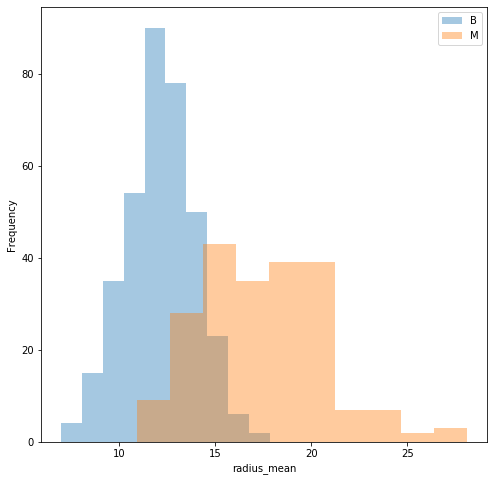

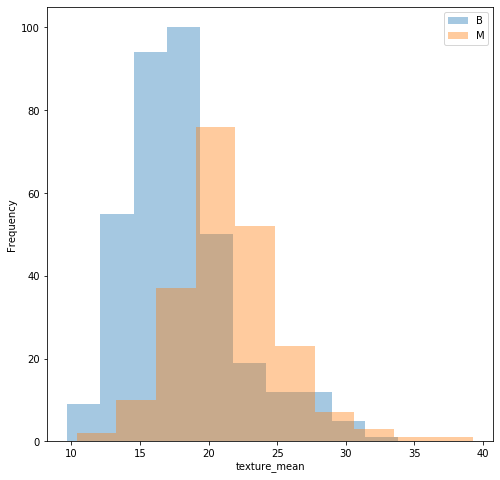

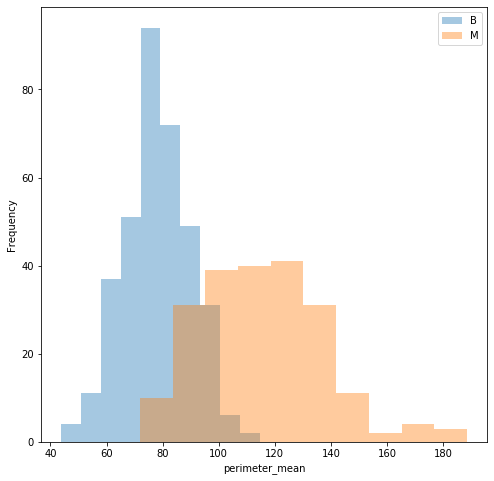

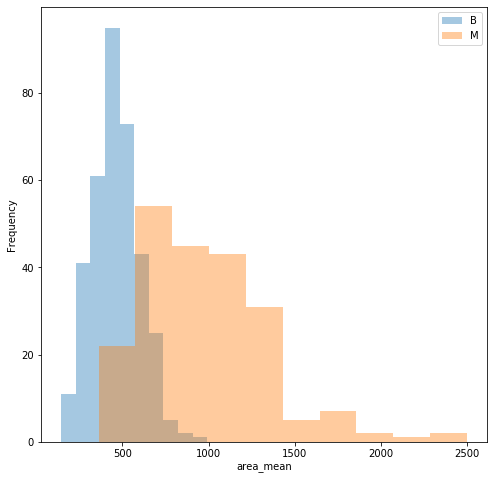

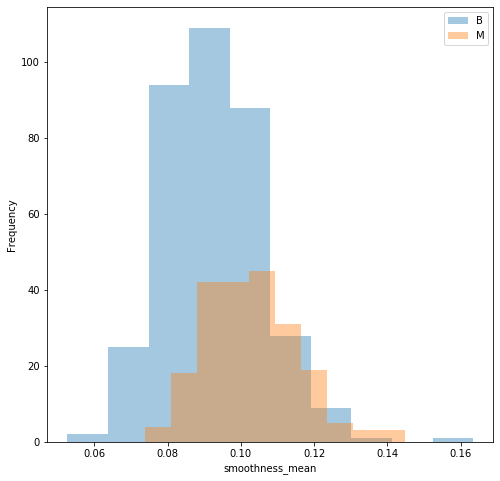

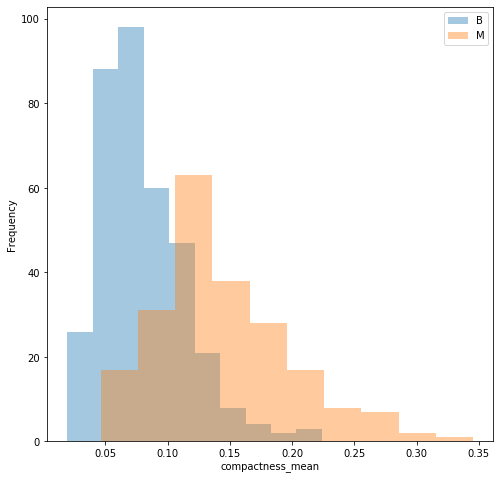

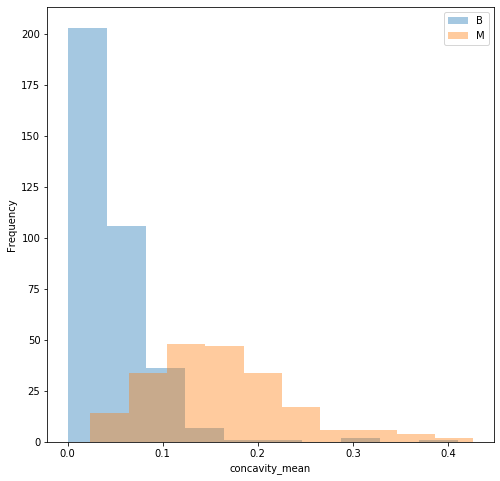

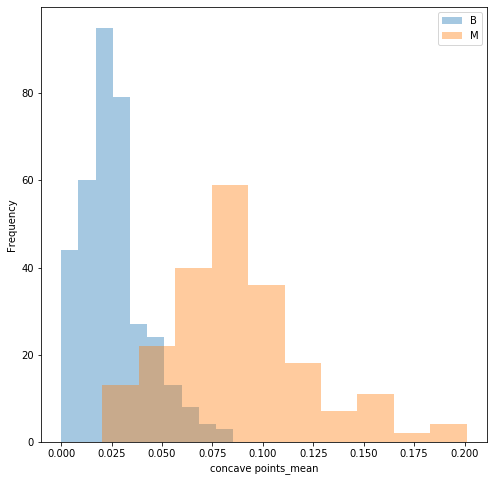

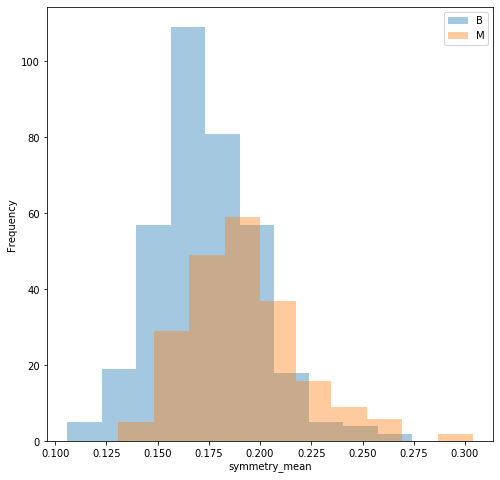

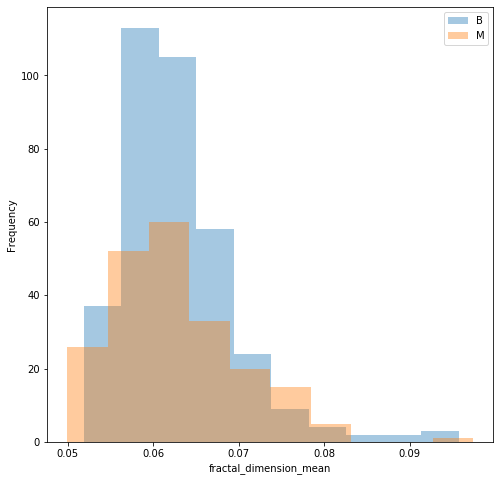

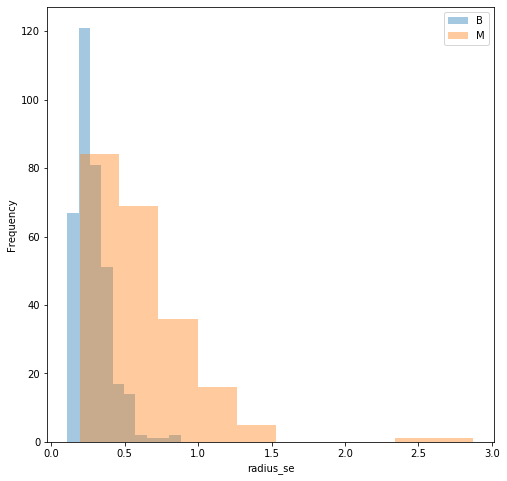

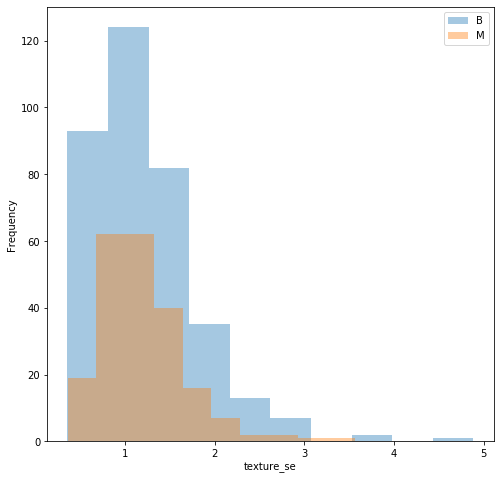

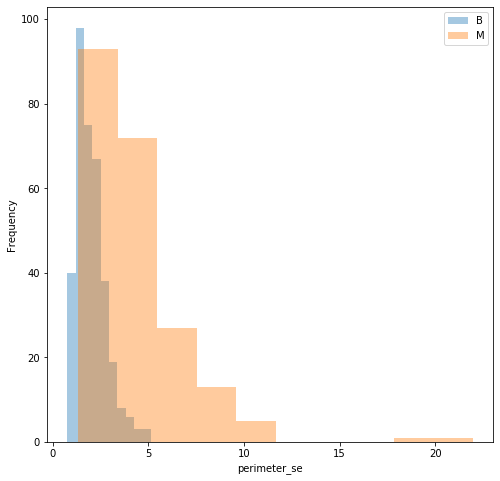

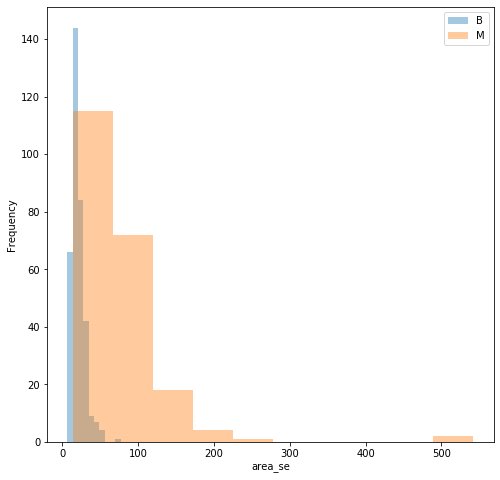

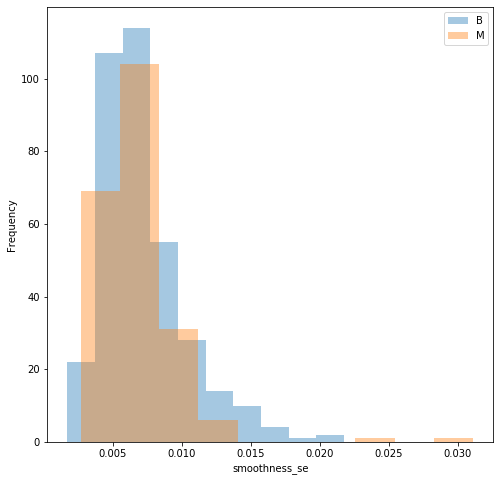

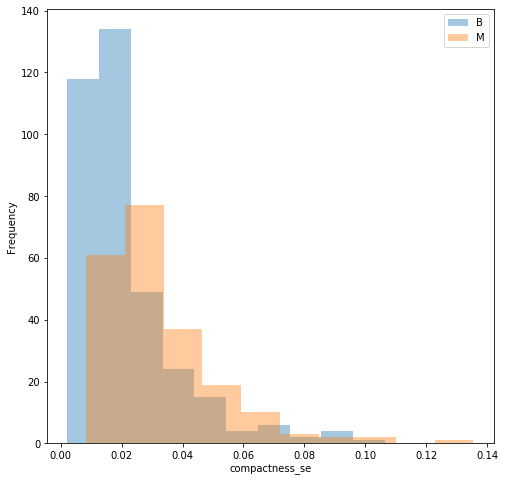

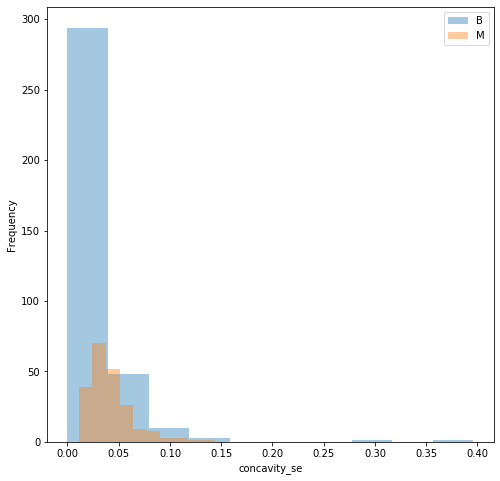

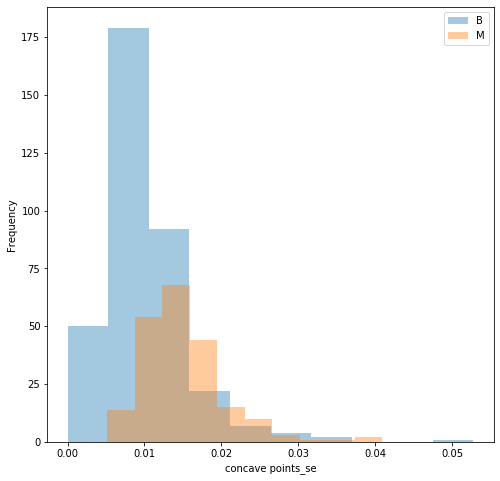

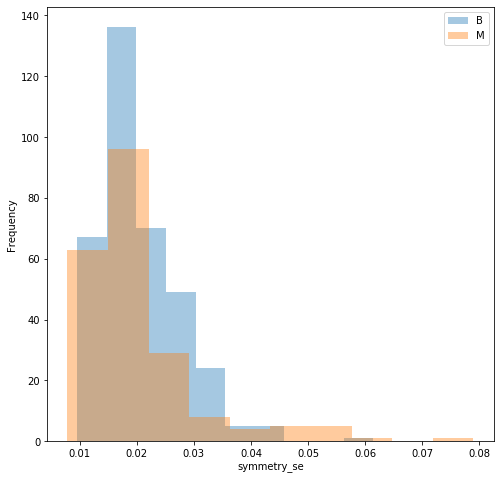

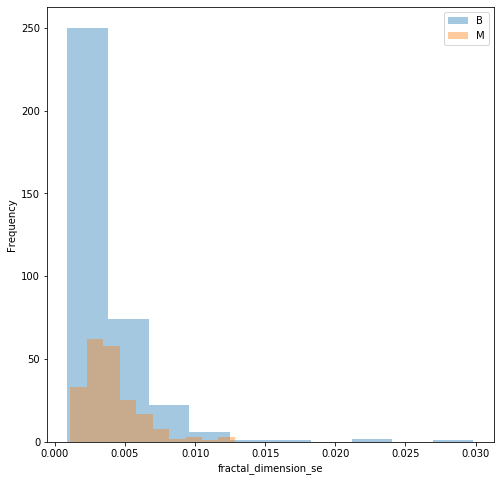

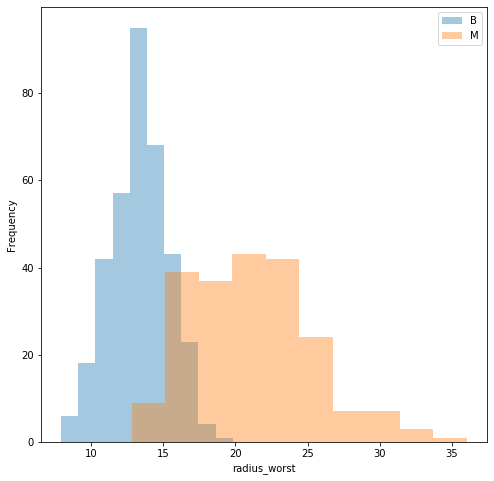

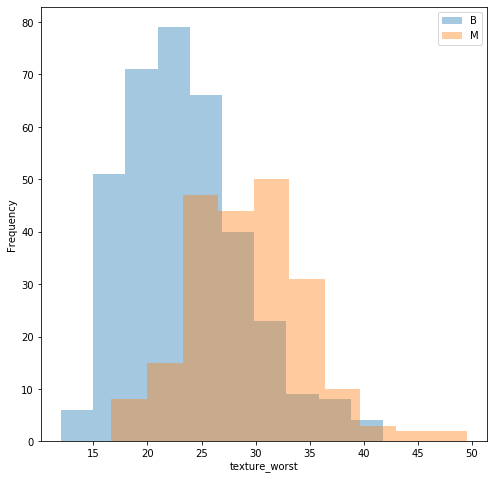

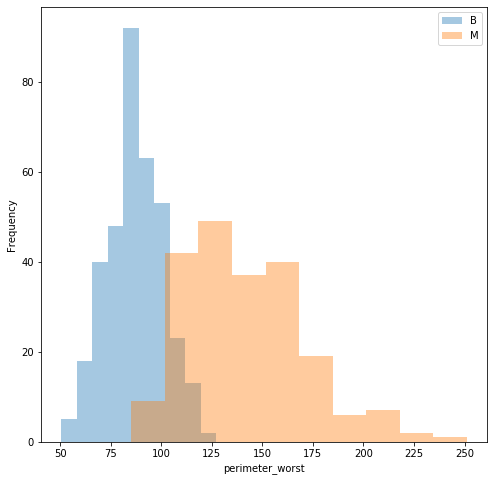

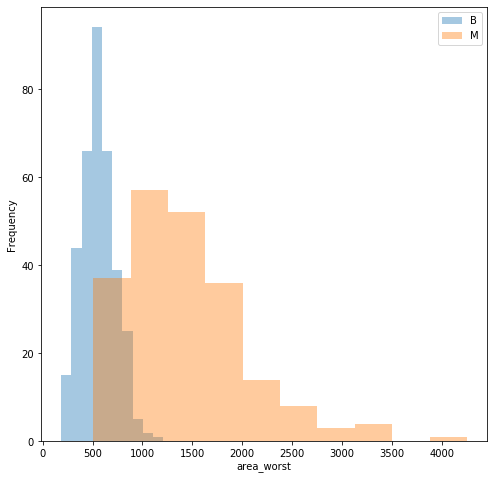

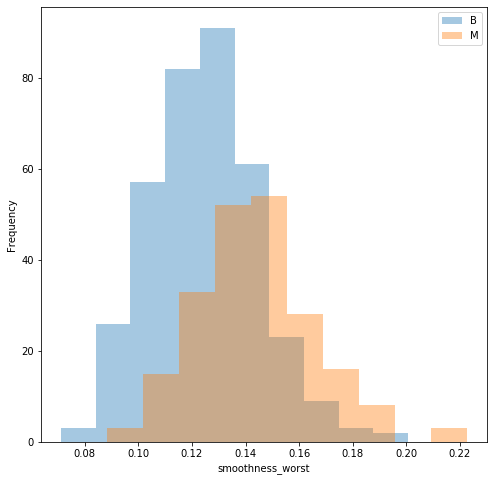

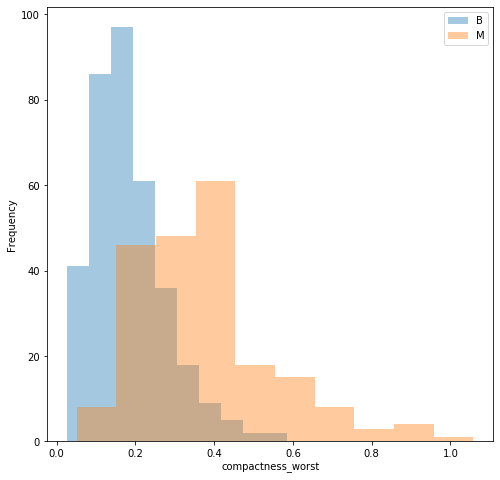

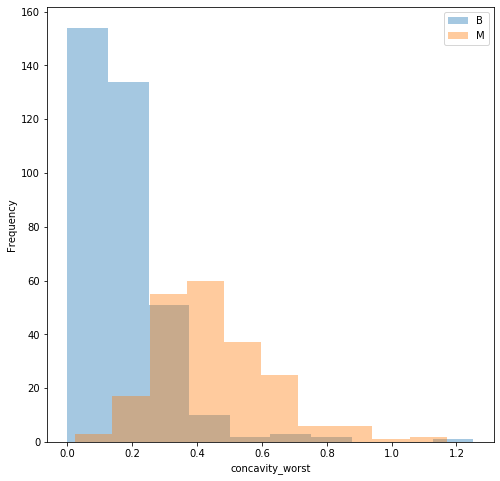

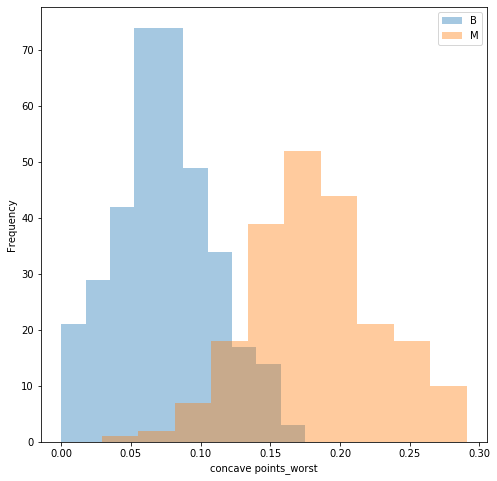

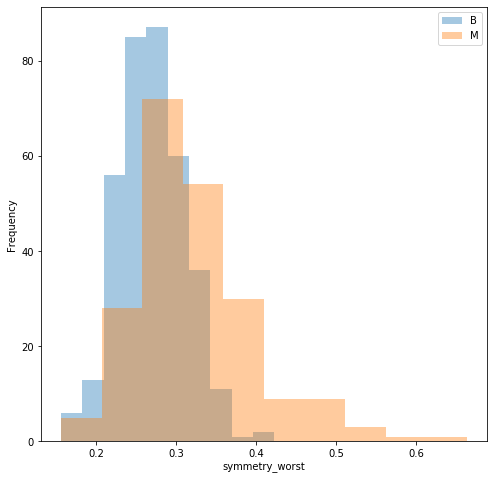

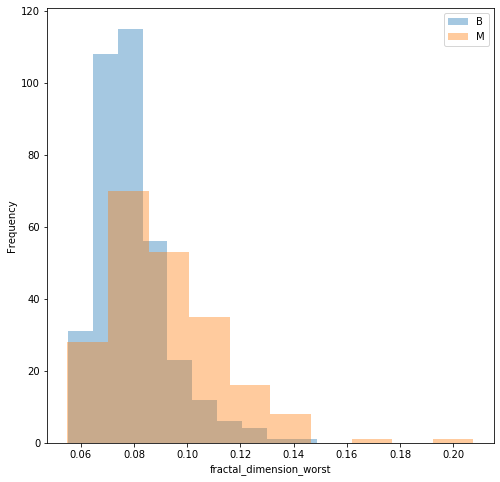

In [13]:
for col in data.select_dtypes('number').columns:
    group_area = data.groupby(['diagnosis'])[col]
    group_area.plot(kind='hist', figsize=[8,8], alpha = .4, legend=True)
    plt.xlabel(col)
    plt.show()

As we can see from histograms above there are some features which distributions vary significantly due to malignant and benign cases.<br><br>
I would **choose** *radius_mean*, *area_mean*, *perimeter_mean*, *concave points_mean*, *area_se*, *radius_worst*, *perimeter_worst*, *area_worst*, *concave points_worst* features to distinguish between malignant and benign cases because their histograms differ seriously for those cases.<br><br>
Due to plots above I would **exclude** *texture_mean*, *smoothness_mean*, *symmetry_mean*, *fractal_dimension_mean*, *radius_se*, *texture_se*, *perimeter_se*, *smoothnes_se*, *compactness_se*, *concavity_se*, *concave points_se*, *symmetry_se*, *fractal_dimension_se*, *texture_worst*, *smoothness_worst*, *symmetry_worst*, *fractal_dimension_worst*. The histograms of the features have significantly big intersections for malignant and benign cases.

<a id="Boxplots"></a>

### Boxplots

#### Boxplot (*radius_mean* relationship with *diagnosis*)

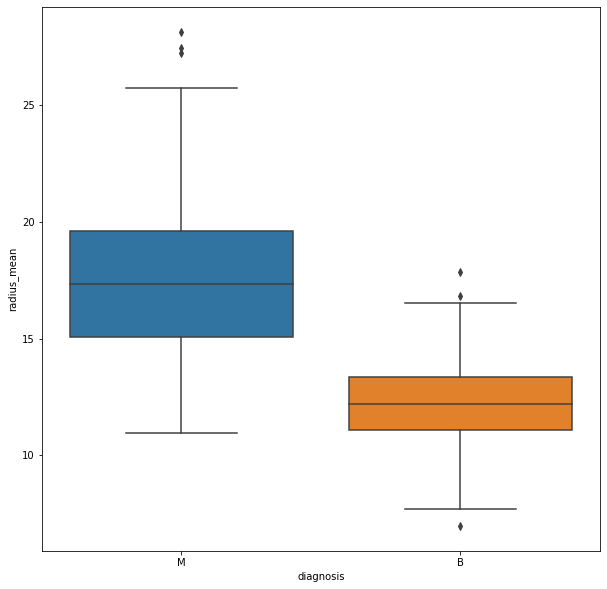

In [14]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x='diagnosis', y='radius_mean', data=data)    
plt.show()    

In [15]:
data[['diagnosis', 'radius_mean']].groupby(['diagnosis'], as_index=False).mean().sort_values(by='radius_mean', ascending=False)

,diagnosis,radius_mean
1,M,17.462830
0,B,12.146524


The mean value of *radius_mean* for malignant cases is 17.462830, for benign cases is 12.146524 (benign tumors are smaller).
As we see from the plot maximum *radius_mean* value for malign cases is much higher than the one for benign cases.

#### Boxplot (*texture_mean* relationship with *diagnosis*)

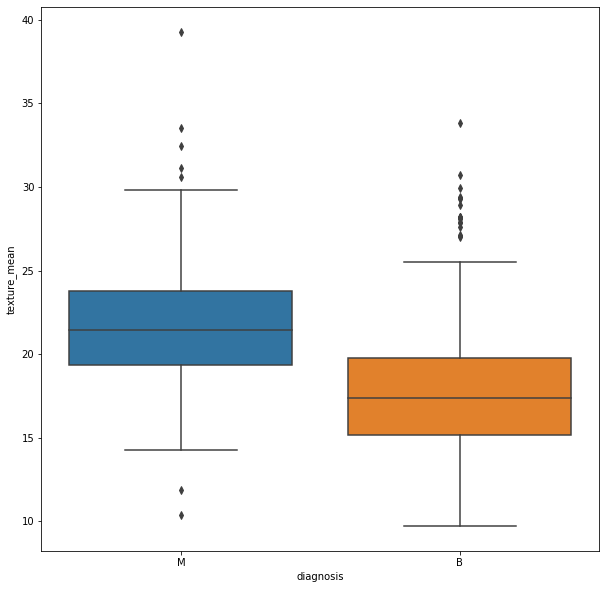

In [16]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="texture_mean", data=data)
plt.show()

In [17]:
data[['diagnosis', 'texture_mean']].groupby(['diagnosis'], as_index=False).mean().sort_values(by='texture_mean', ascending=False)

,diagnosis,texture_mean
1,M,21.604906
0,B,17.914762


The mean value of *radius_mean* for malignant cases is 21.604906, for benign cases is 17.914762. Nevertheless on the plot we can see that variation of the *texture_mean* for malignant cases looks the same as for benign cases. We've already seen that in [Histograms](#Histograms) section.

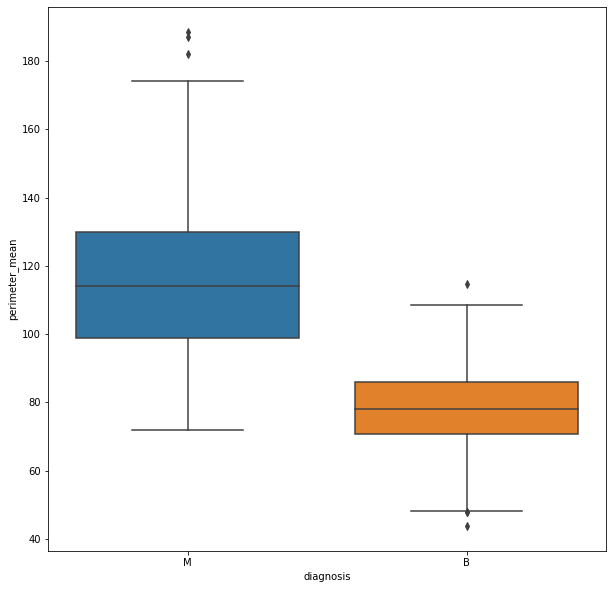

In [18]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="perimeter_mean", data=data)
plt.show()

In [19]:
data[['diagnosis', 'perimeter_mean']].groupby(['diagnosis'], as_index=False).mean().sort_values(by='perimeter_mean', ascending=False)

,diagnosis,perimeter_mean
1,M,115.365377
0,B,78.075406


On the plot we can see that *perimeter_mean* is much more representative for defining diagnosis than *texture_mean*. The mean value of *perimeter_mean* for malignant is 115.365377, for benign is 78.075406.<br>
Max value of *perimeter_mean* for malignant is much bigger than for benign. Min value of *perimeter_mean* for benign is smaller than for malignant. This is rather good feature for our task.

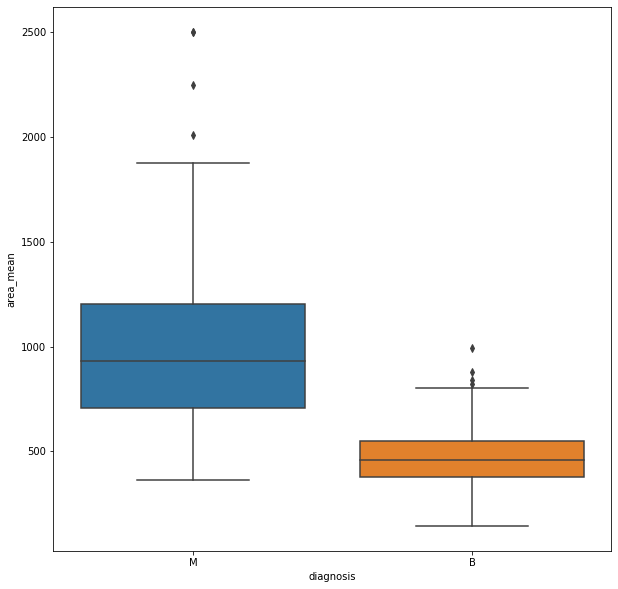

In [20]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="area_mean", data=data)
plt.show()

In [21]:
data[['diagnosis', 'area_mean']].groupby(['diagnosis'], as_index=False).mean().sort_values(by='area_mean', ascending=False)

,diagnosis,area_mean
1,M,978.376415
0,B,462.790196


One more good feature according to difference between mean values and according to values of quartiles for malignant and benign tumors!

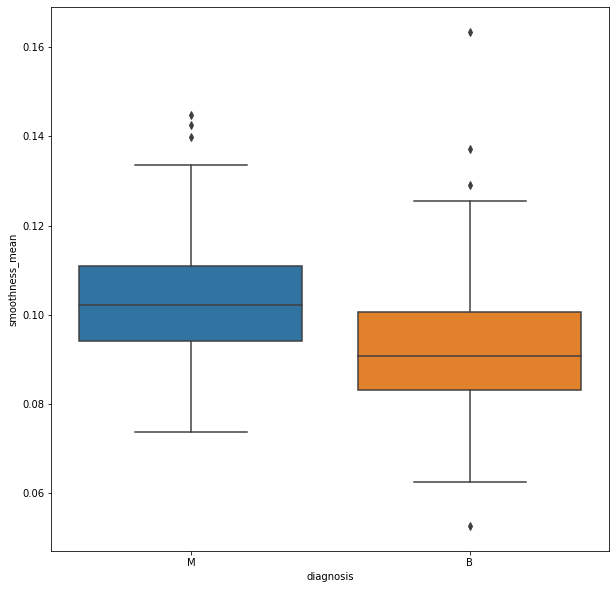

In [22]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="smoothness_mean", data=data)
plt.show()

From the above we can see that *smoothness_mean* is not good at categorizing malignant and benign cases. Already saw that in [Histograms](#Histograms).

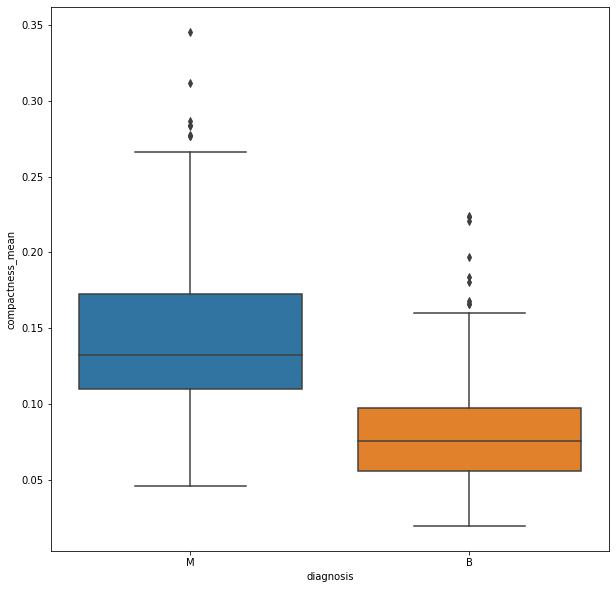

In [23]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="compactness_mean", data=data)
plt.show()

*Compactness_mean* is rather good for splitting malignant and benign tumors. May be because *сompactness_mean* is mean of `perimeter^2 / area - 1.0`, and perimeter and area are valuable features for our task.

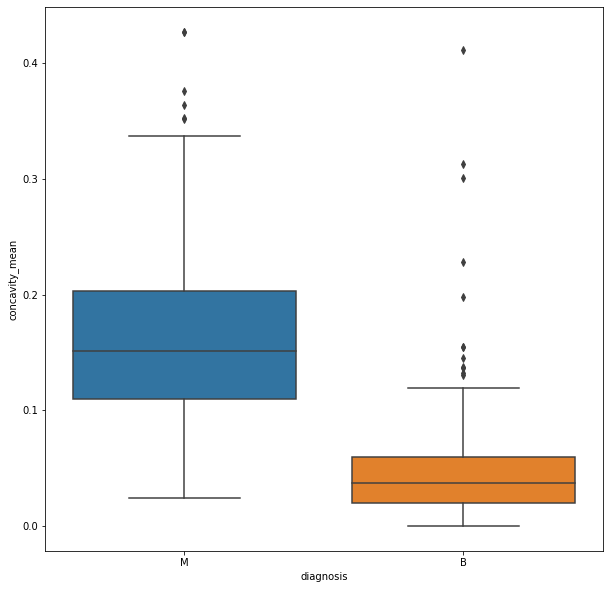

In [24]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="concavity_mean", data=data)
plt.show()

In [25]:
data[['diagnosis', 'concavity_mean']].groupby(['diagnosis'], as_index=False).mean().sort_values(by='concavity_mean', ascending=False)

,diagnosis,concavity_mean
1,M,0.160775
0,B,0.046058


*Concativity_mean* is rather good for tumors categorization. Mean value of *concavity_mean* for malignant cases is 0.160775, for benign is 0.046058. There are many outliers in the benign cases group. 

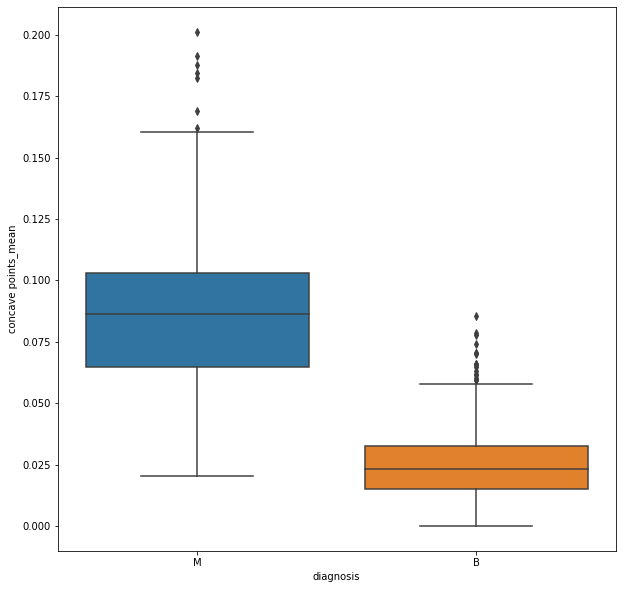

In [26]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="concave points_mean", data=data)
plt.show()

In [27]:
data[['diagnosis', 'concave points_mean']].groupby(['diagnosis'], as_index=False).mean().sort_values(by='concave points_mean', ascending=False)

,diagnosis,concave points_mean
1,M,0.087990
0,B,0.025717


Bivariate analysis with the boxplot shows that median for *concave points_mean* is greater for malignant cases. It is a notable feature for defining diagnosis. <br>Mean value of *concave points_mean* for malignant tumors is 0.087990, for benign is 0.025717. 

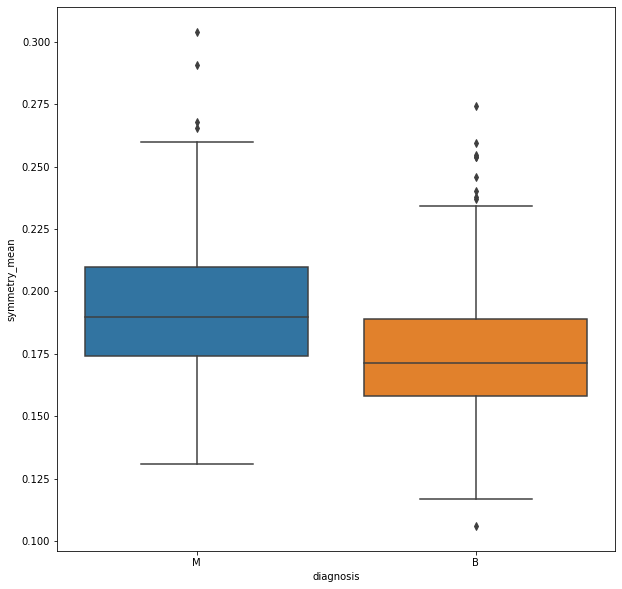

In [28]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="symmetry_mean", data=data)
plt.show()

*Symmetry_mean* values are rather alike both for malignant and benign cases.<br>
**That plot and other ones below confirm that corresponding features are useless for making a diagnosis.** We've already seen that in [Histograms](#Histograms) section.


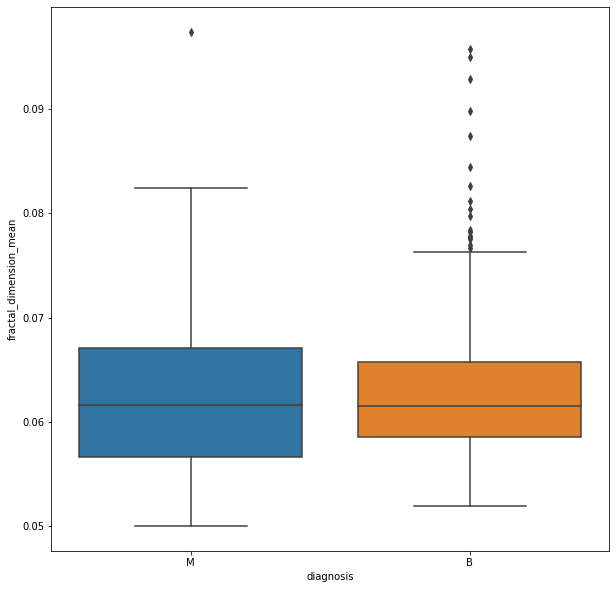

In [29]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="fractal_dimension_mean", data=data)
plt.show()

*fractal_dimension_mean* values are rather alike both for malignant and benign cases. More outliers present in benign cases.

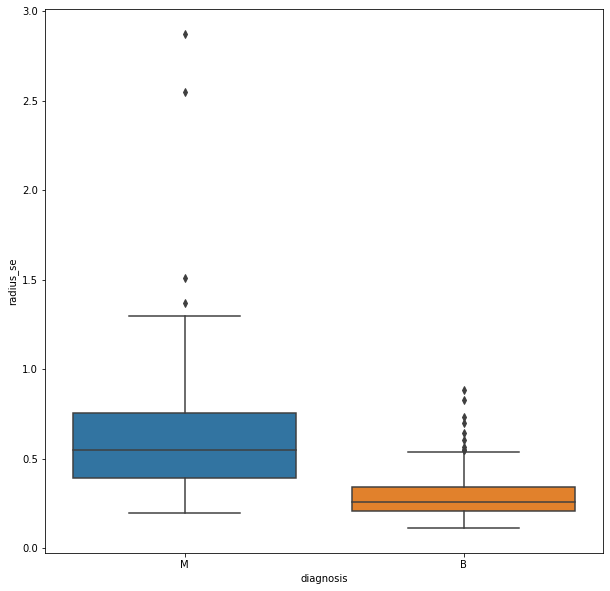

In [30]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="radius_se", data=data)
plt.show()

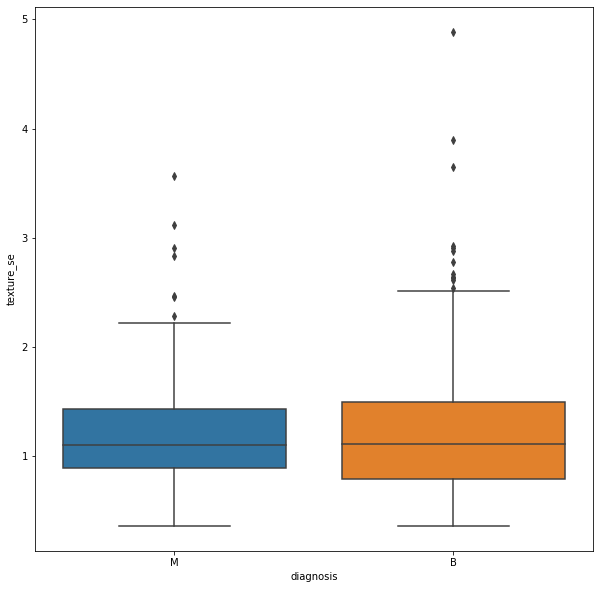

In [31]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="texture_se", data=data)
plt.show()

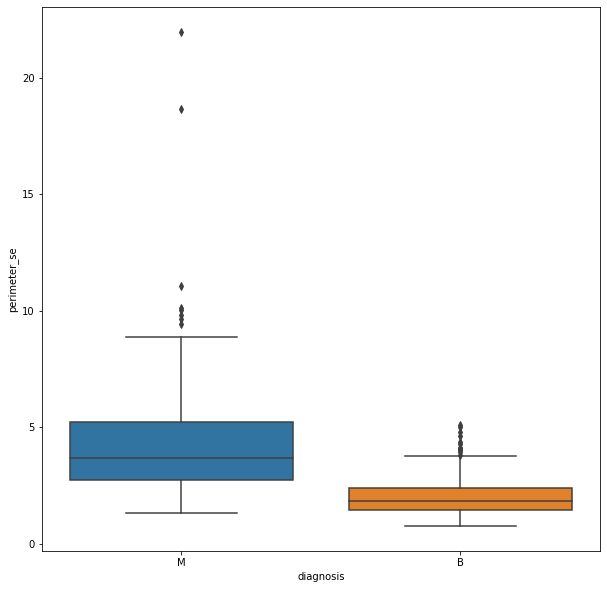

In [32]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="perimeter_se", data=data)
plt.show()

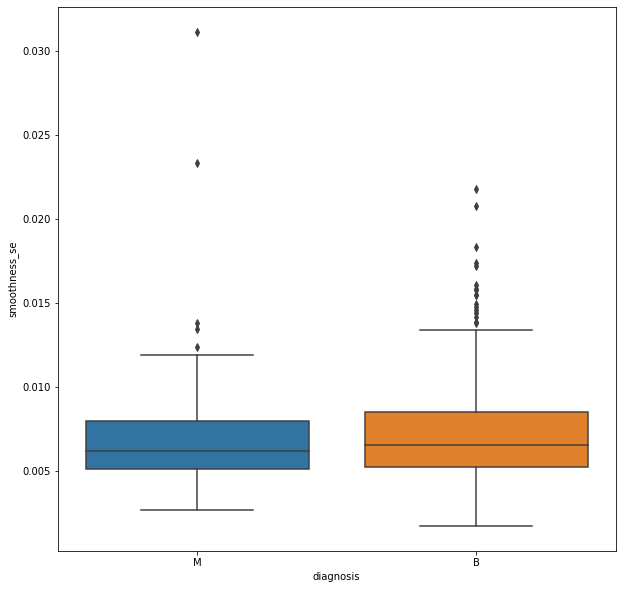

In [33]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="smoothness_se", data=data)
plt.show()

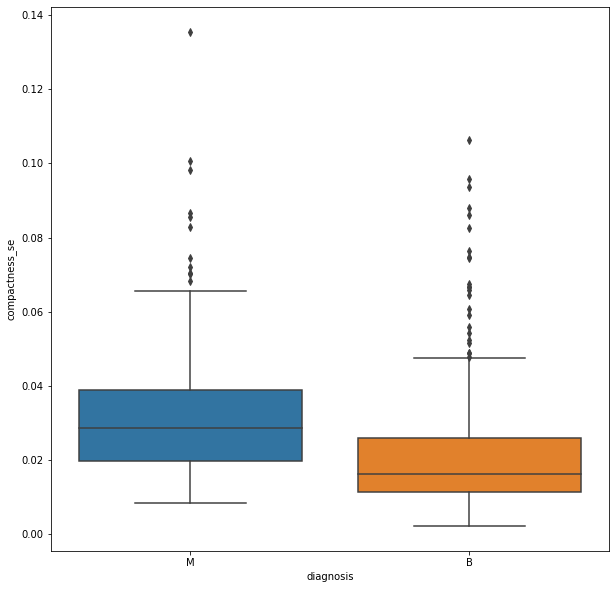

In [34]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="compactness_se", data=data)
plt.show()

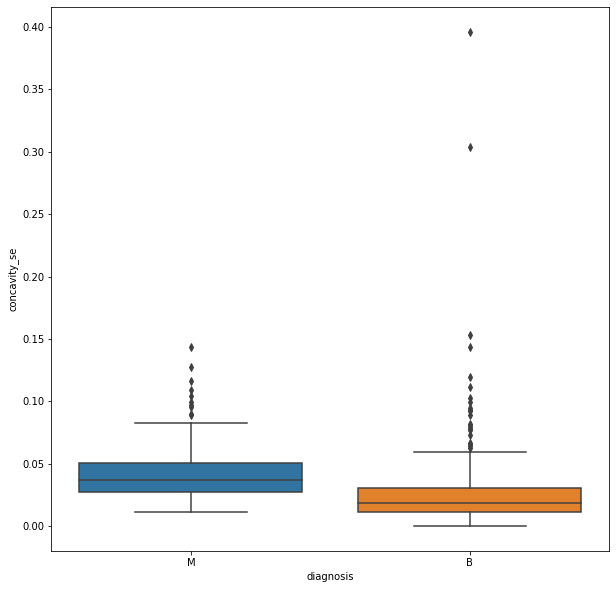

In [35]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="concavity_se", data=data)
plt.show()

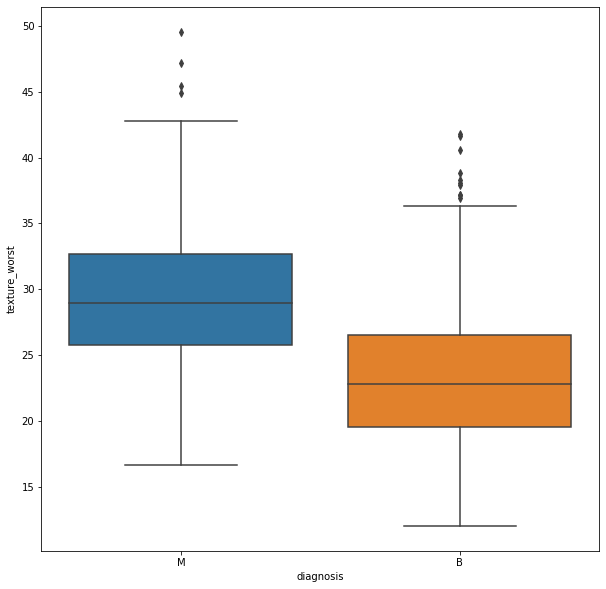

In [36]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="texture_worst", data=data)
plt.show()

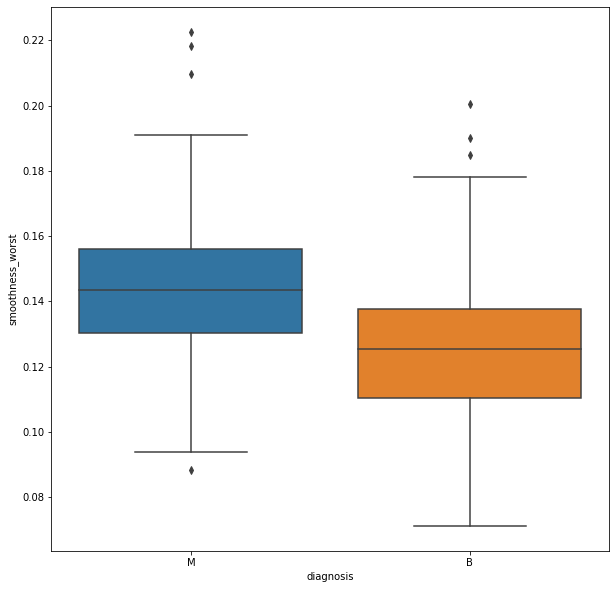

In [37]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="smoothness_worst", data=data)
plt.show()

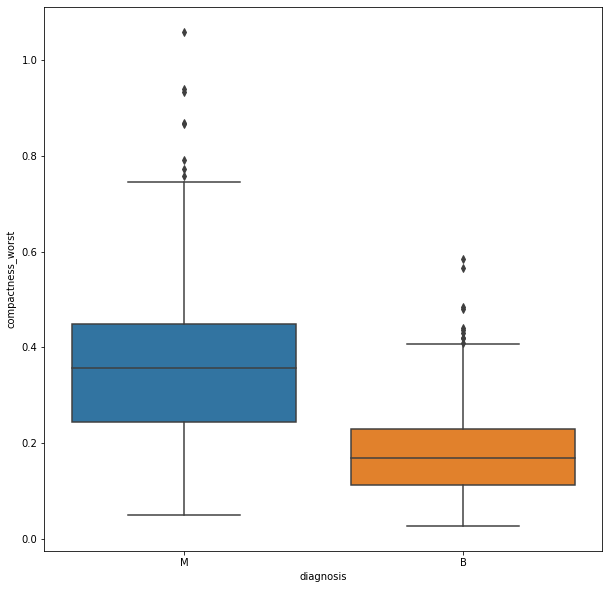

In [38]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="compactness_worst", data=data)
plt.show()

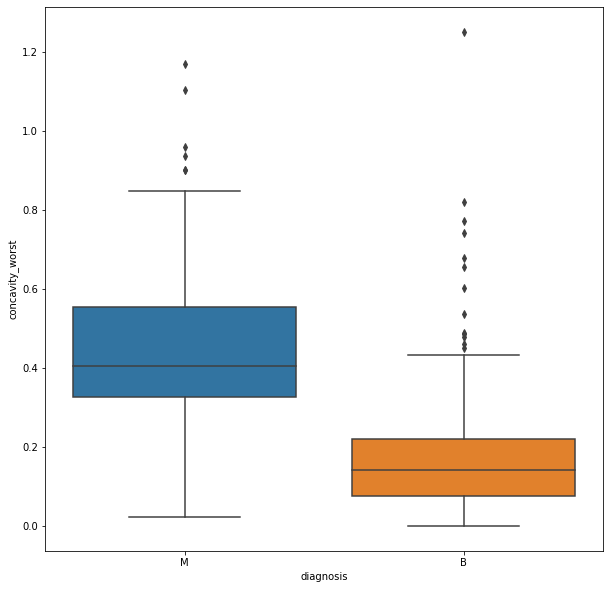

In [39]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="concavity_worst", data=data)
plt.show()

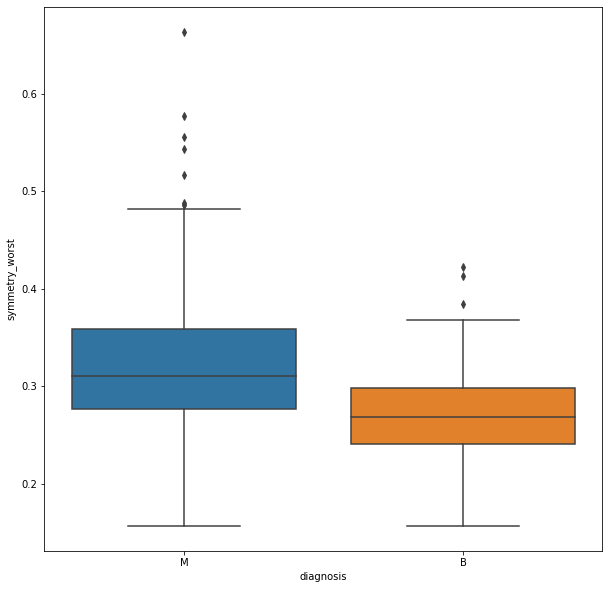

In [40]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="symmetry_worst", data=data)
plt.show()

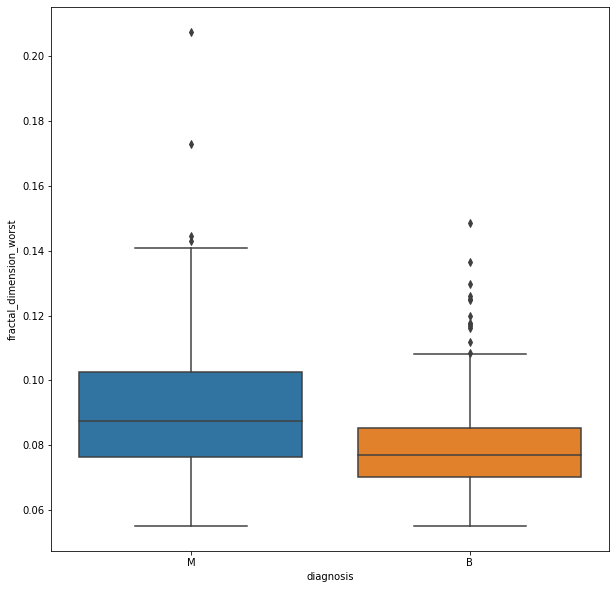

In [41]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="fractal_dimension_worst", data=data)
plt.show()

**The plots below show us rather serious relationship between features and our target variable *diagnosis*.**

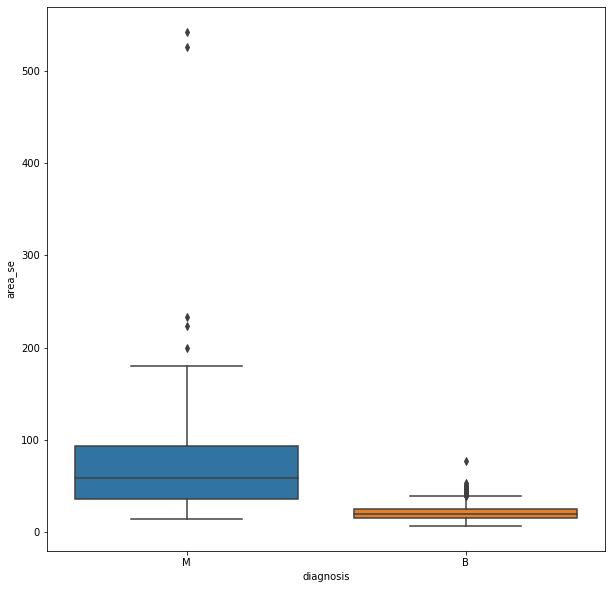

In [42]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="area_se", data=data)
plt.show()

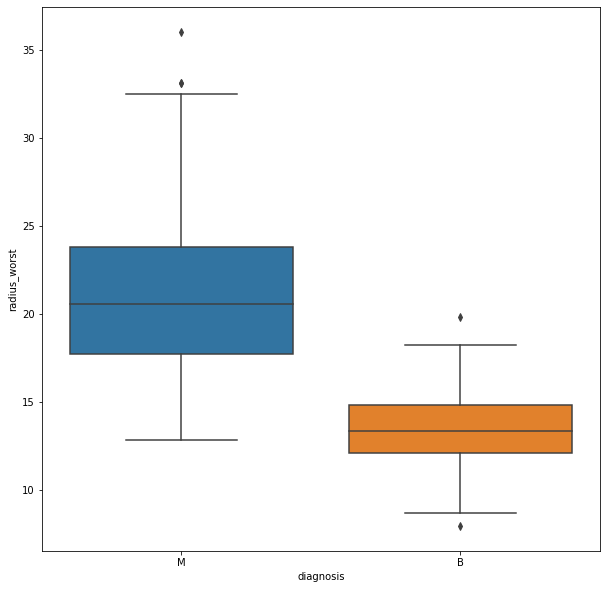

In [43]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="radius_worst", data=data)
plt.show()

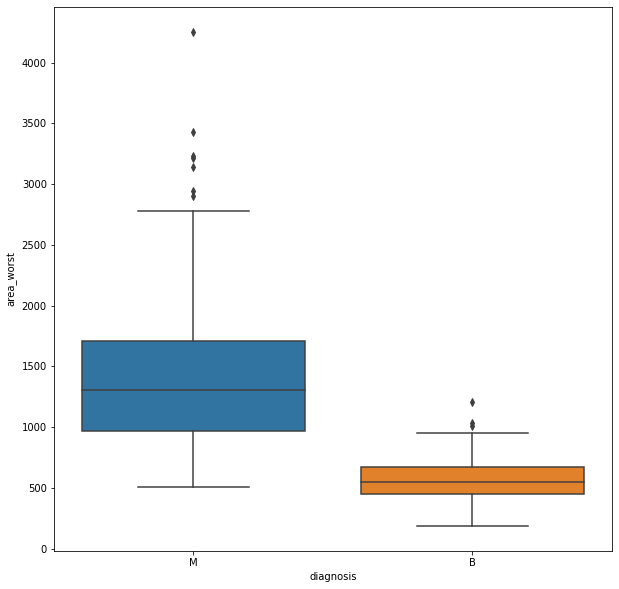

In [44]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="area_worst", data=data)
plt.show()

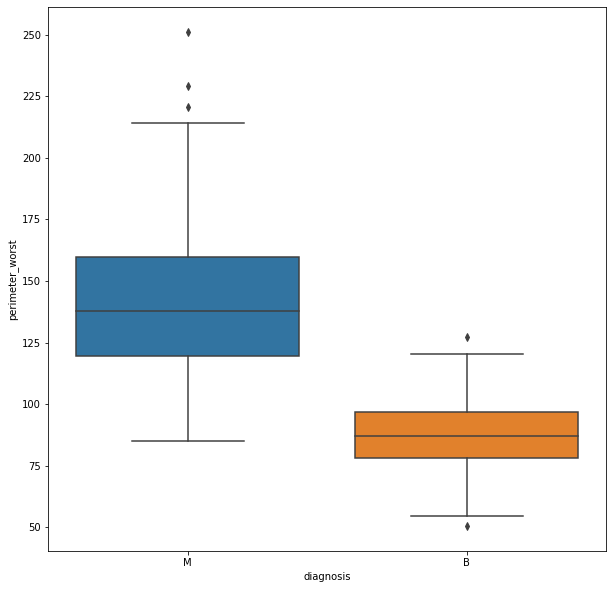

In [45]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="perimeter_worst", data=data)
plt.show()

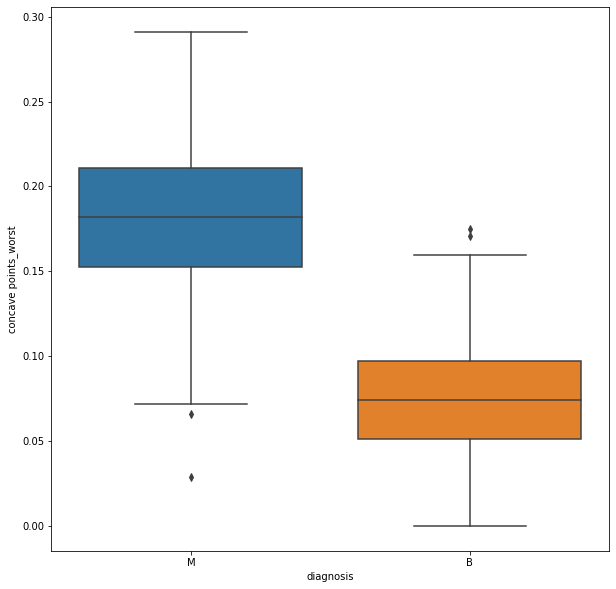

In [46]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="diagnosis", y="concave points_worst", data=data)
plt.show()

The summary of boxplot analysis confirmed the summary of [histograms](#Histograms) analysis.

<a id="Correlation"></a>

### Correlation
#### Correlation among the numeric variables

In [47]:
corr_matrix = data.corr()

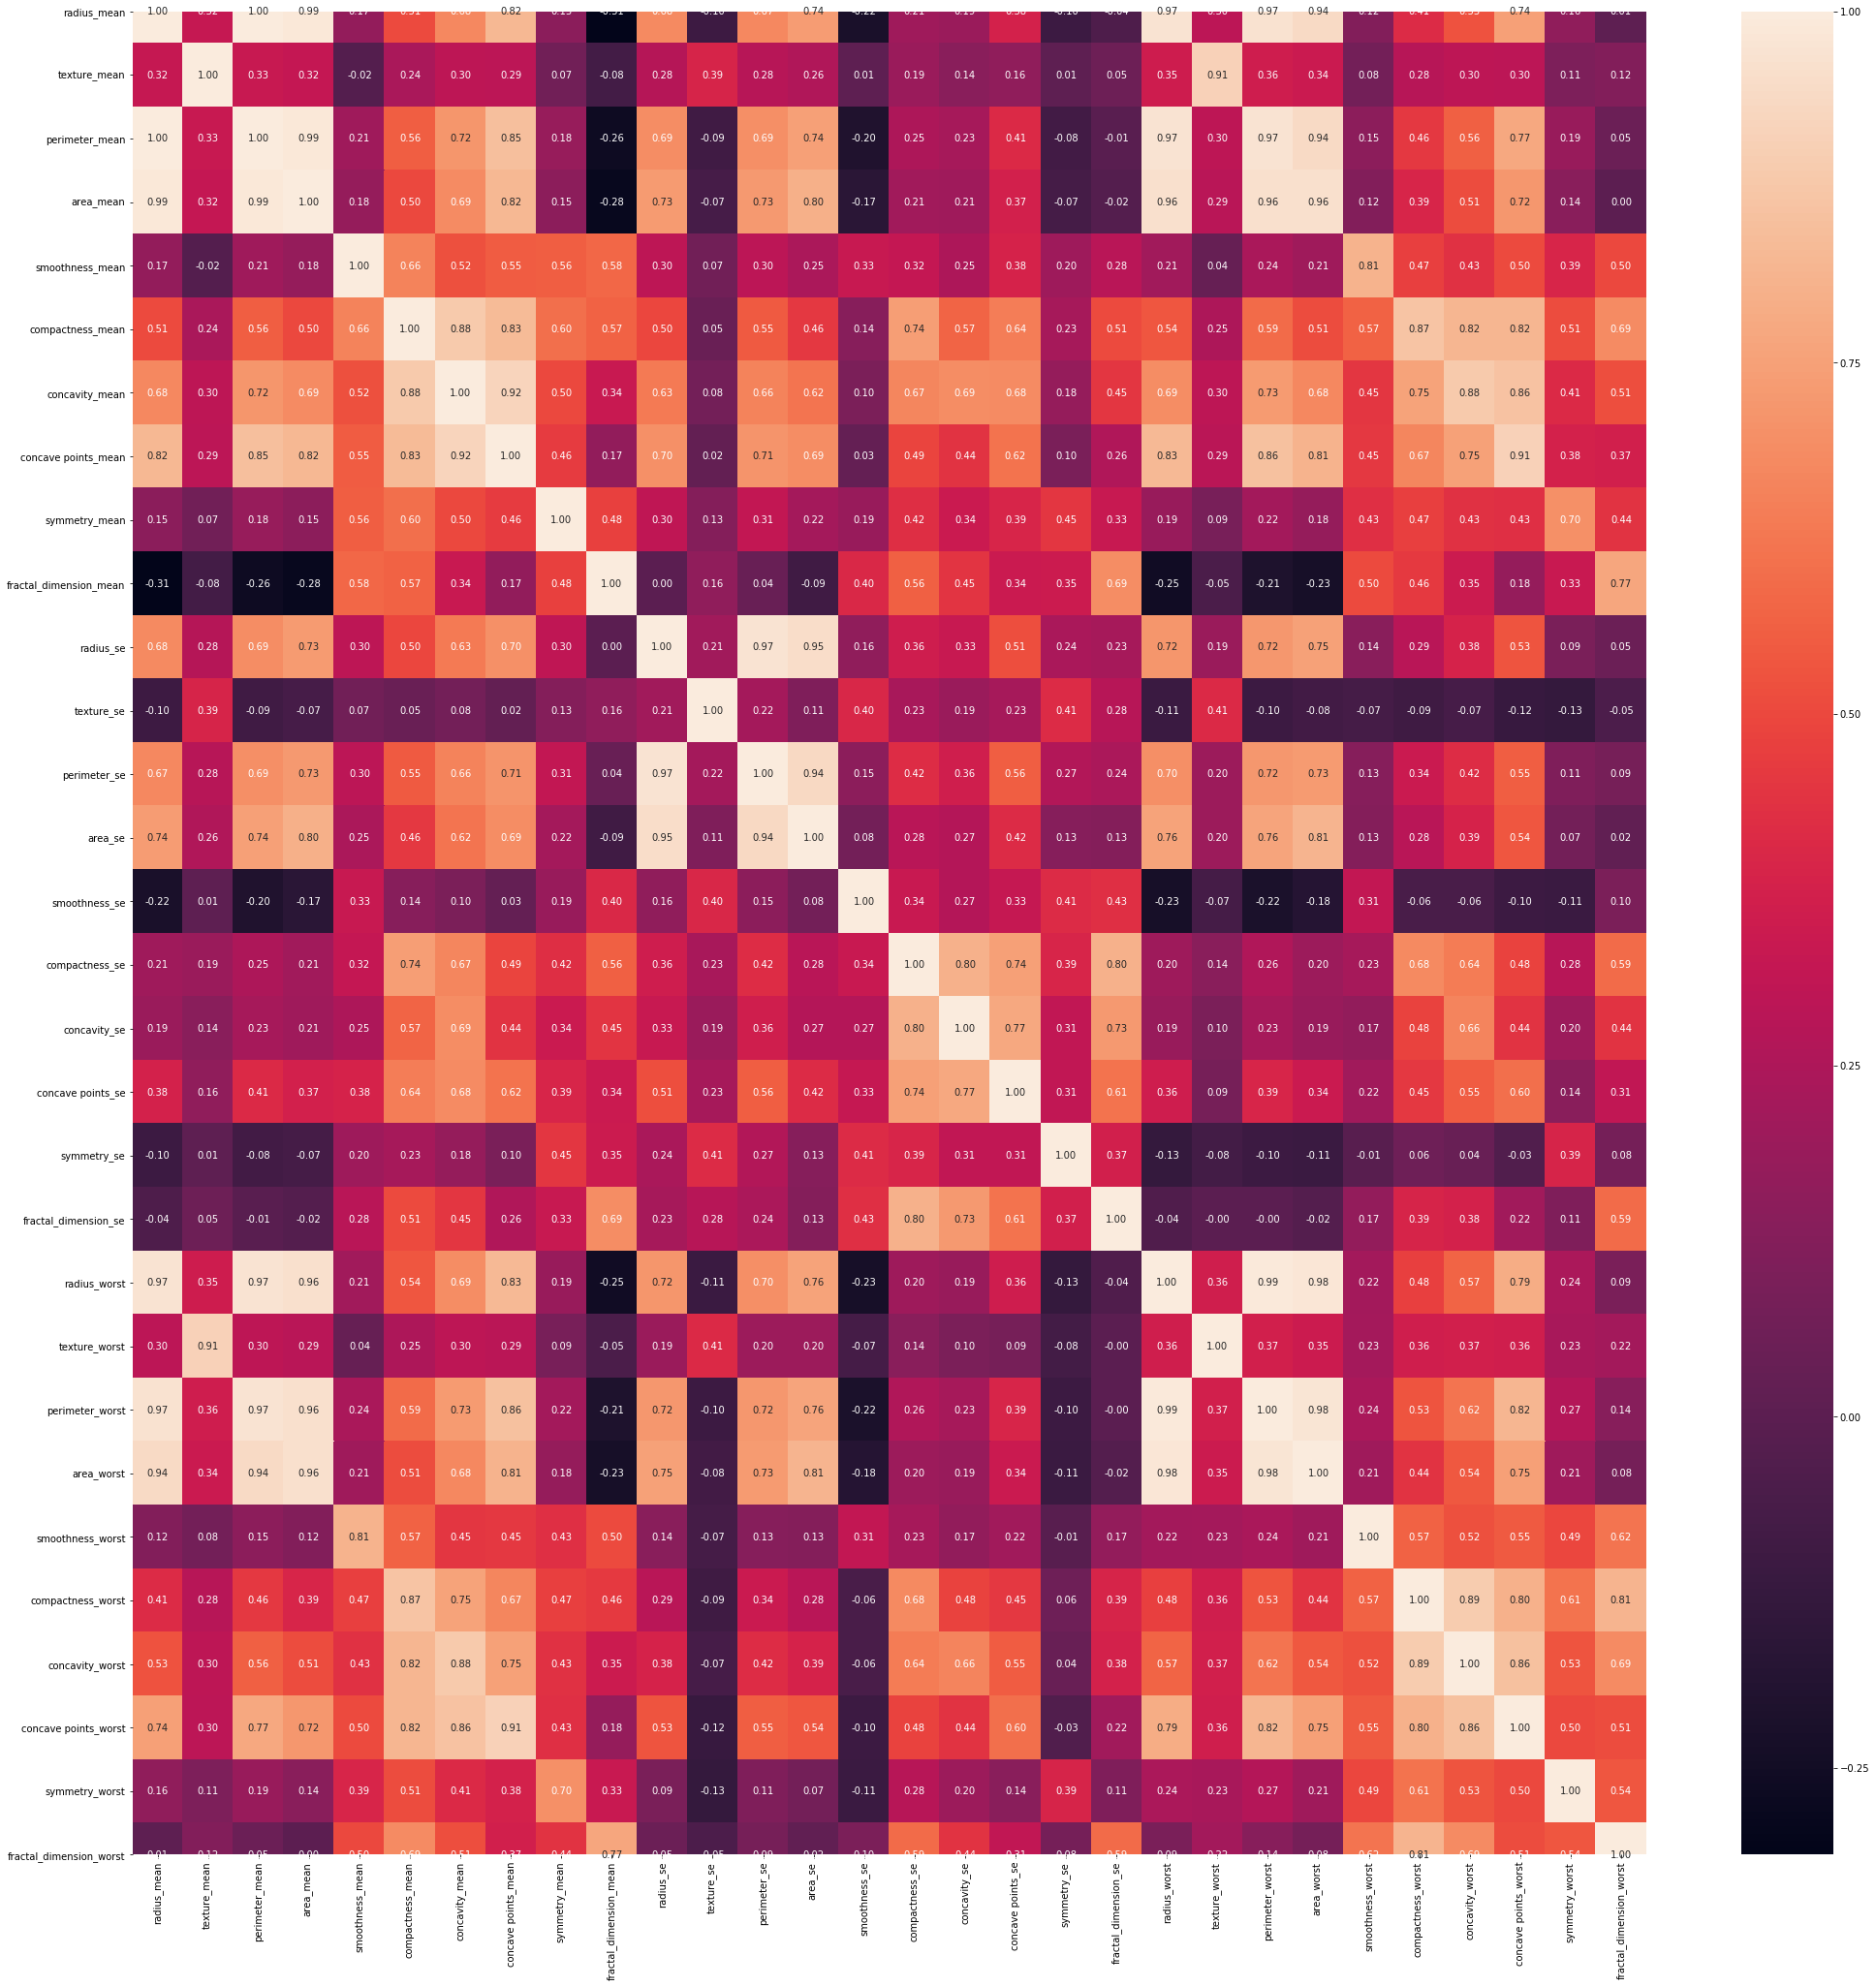

In [48]:
plt.figure(figsize=(35,35));
sns.heatmap(corr_matrix, annot=True, fmt='.2f');

In [49]:
# iterate over columns only in the lower triangular matrix of correlation matrix
most_correlated = []
j = 1
for i in np.arange(corr_matrix.shape[0]):
    for k in np.arange(j, corr_matrix.shape[1]):
        if corr_matrix.iat[k,i] > 0.85:
            # write to most_correlated array correlated features pairs
            most_correlated.append([corr_matrix.columns.values[k], corr_matrix.index.values[i]])
            #print(k, corr_matrix.columns.values[k], i,corr_matrix.index.values[i], corr_matrix.iat[k, i])
    j += 1

Let's create scatter plots for the most correlated features using seaborn `regplot` method. As it is based on regression by default it will introduce a regression line in the data.

Correlation coefficient between perimeter_mean and radius_mean is equal to 0.9978552814938113


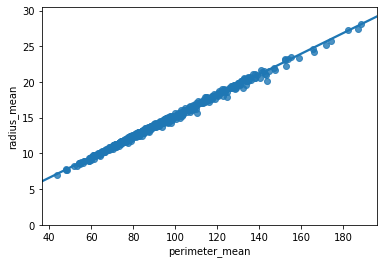

Correlation coefficient between area_mean and radius_mean is equal to 0.9873571700566119


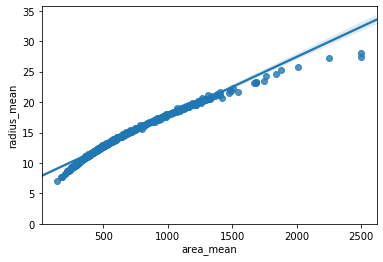

Correlation coefficient between radius_worst and radius_mean is equal to 0.9695389726112053


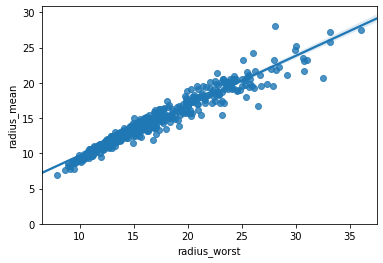

Correlation coefficient between perimeter_worst and radius_mean is equal to 0.9651365139559878


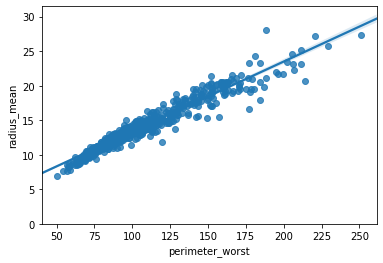

Correlation coefficient between area_worst and radius_mean is equal to 0.9410824595860459


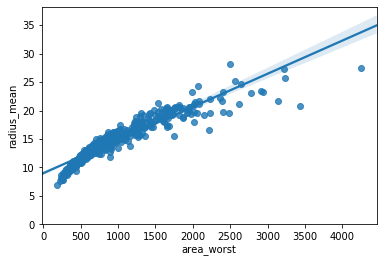

Correlation coefficient between texture_worst and texture_mean is equal to 0.9120445888404215


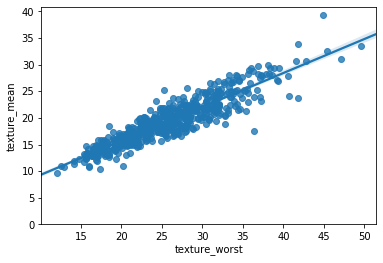

Correlation coefficient between area_mean and perimeter_mean is equal to 0.9865068039913906


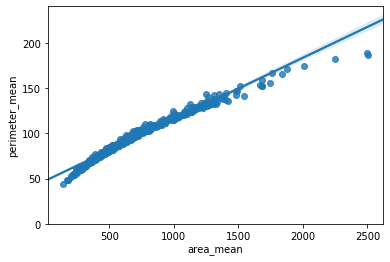

Correlation coefficient between concave points_mean and perimeter_mean is equal to 0.8509770412528199


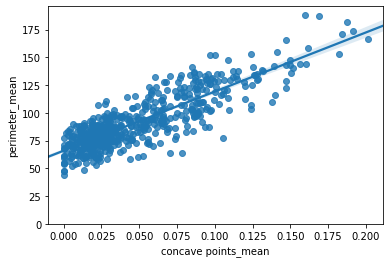

Correlation coefficient between radius_worst and perimeter_mean is equal to 0.9694763634663142


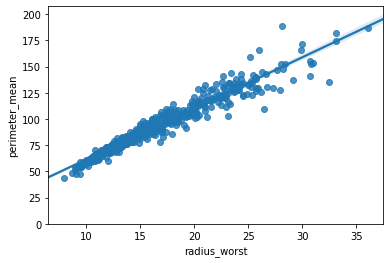

Correlation coefficient between perimeter_worst and perimeter_mean is equal to 0.9703868870426388


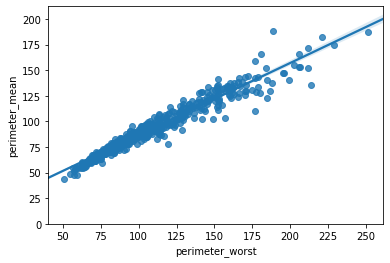

Correlation coefficient between area_worst and perimeter_mean is equal to 0.9415498080023057


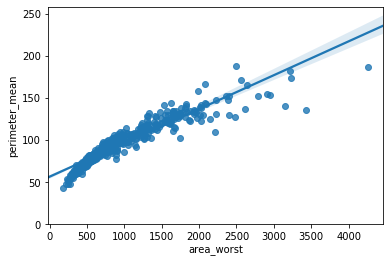

Correlation coefficient between radius_worst and area_mean is equal to 0.9627460860470841


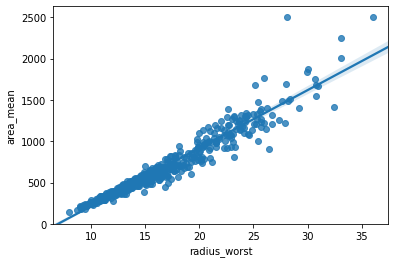

Correlation coefficient between perimeter_worst and area_mean is equal to 0.959119574355266


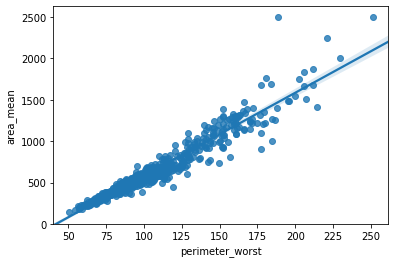

Correlation coefficient between area_worst and area_mean is equal to 0.9592133256499006


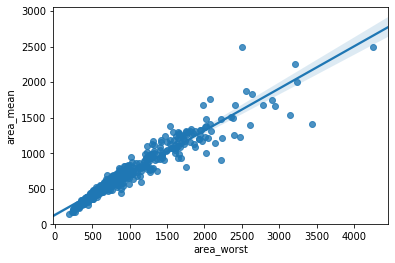

Correlation coefficient between concavity_mean and compactness_mean is equal to 0.8831206701772499


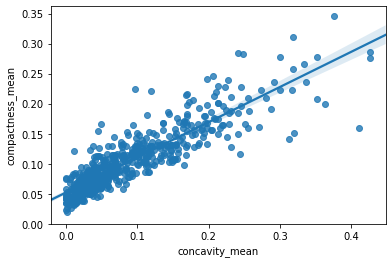

Correlation coefficient between compactness_worst and compactness_mean is equal to 0.8658090398022638


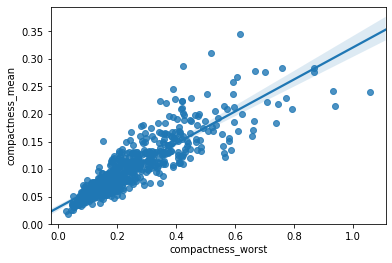

Correlation coefficient between concave points_mean and concavity_mean is equal to 0.9213910263788594


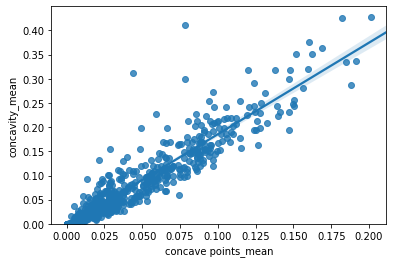

Correlation coefficient between concavity_worst and concavity_mean is equal to 0.8841026390943831


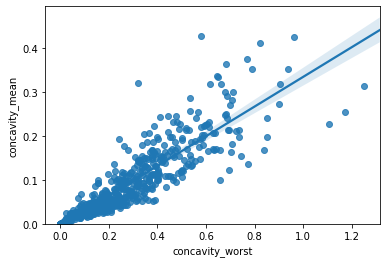

Correlation coefficient between concave points_worst and concavity_mean is equal to 0.8613230336379504


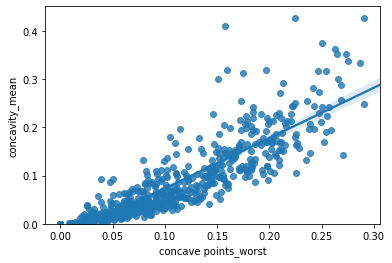

Correlation coefficient between perimeter_worst and concave points_mean is equal to 0.8559231281343112


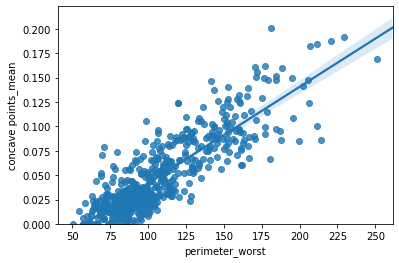

Correlation coefficient between concave points_worst and concave points_mean is equal to 0.9101553142985934


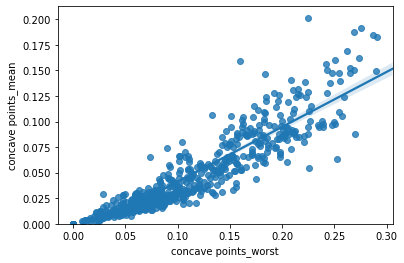

Correlation coefficient between perimeter_se and radius_se is equal to 0.9727936770160752


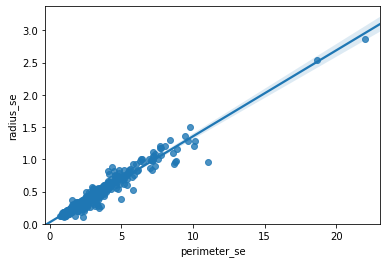

Correlation coefficient between area_se and radius_se is equal to 0.95183011211099


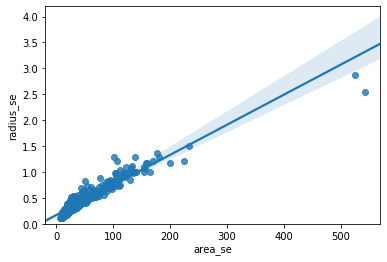

Correlation coefficient between area_se and perimeter_se is equal to 0.9376554069544158


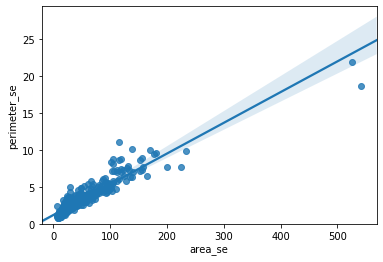

Correlation coefficient between perimeter_worst and radius_worst is equal to 0.993707916102951


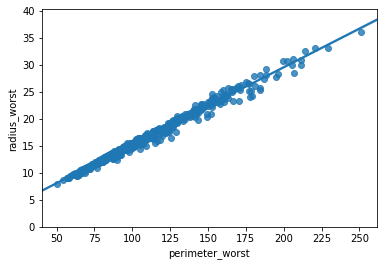

Correlation coefficient between area_worst and radius_worst is equal to 0.9840145644590724


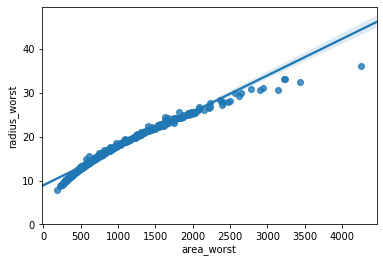

Correlation coefficient between area_worst and perimeter_worst is equal to 0.9775780914063881


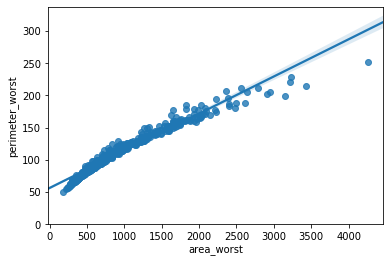

Correlation coefficient between concavity_worst and compactness_worst is equal to 0.8922608987764692


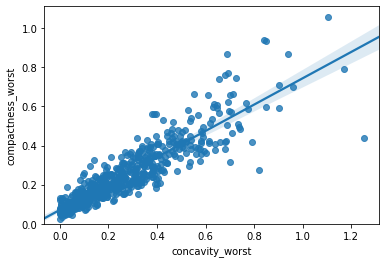

Correlation coefficient between concave points_worst and concavity_worst is equal to 0.8554338603439984


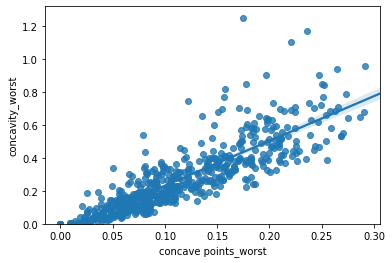

In [50]:
for pair in most_correlated:
    print('Correlation coefficient between', pair[0], 'and', pair[1], 'is equal to', corr_matrix.at[pair[0], pair[1]])
    sns.regplot(x=pair[0], y=pair[1], data=data)
    plt.ylim(0,);
    plt.show()

For bigger correlation values data points will better correspond to the regression line.<br><br>
Correlation between *perimeter_mean* and *radius_mean* converge to 1 as well as correlation between *area_mean* and *radius_mean* and *area_mean* and *perimeter_mean*. It's because tumors' shape looks like circle, and there is a dependence between perimeter, radius and area of the circle.<br><br>
Also the following pairs of features have very strong correlation (correlation coefficient > 0.9):
- *area_worst* and *perimeter_worst*
- *area_worst* and *radius_worst*
- *perimeter_worst* and *radius_worst*
- *concave points_worst* and *concave points_mean*
- *area_se* and *radius_se*
- *perimeter_se* and *radius_se*
- *concave points_mean* and *concavity_mean*
- *area_worst* and *area_mean*
- *perimeter_worst* and *area_mean*
- *radius_worst* and *area_mean*
- *area_worst* and *perimeter_mean* 
- *perimeter_worst* and *perimeter_mean*
- *radius_worst* and *perimeter_mean*
- *texture_worst* and *texture_mean*
- *area_worst* and *radius_mean*
- *perimeter_worst* and *radius_mean*
- *radius_worst* and *radius_mean*

<a id="More_Data_Cleaning"></a>

## 6. More Data Cleaning

1. I've already dropped *id* feature because it's useless for making diagnosis.
2. Due to [Histograms](#Histograms) I will **exclude** *texture_mean*, *smoothness_mean*, *symmetry_mean*, *fractal_dimension_mean*, *radius_se*, *texture_se*, *perimeter_se*, *smoothness_se*, *compactness_se*, *concavity_se*, *concave points_se*, *symmetry_se*, *fractal_dimension_se*, *texture_worst*, *smoothness_worst*, *symmetry_worst*, *fractal_dimension_worst*. The histograms of the features have significantly big intersections for malignant and benign cases.
3. Let's also drop all strongly correlated features with coefficient > 0.85.

In [51]:
data = data.drop(columns=['texture_mean', 'smoothness_mean', 'symmetry_mean', 
                          'fractal_dimension_mean', 'radius_se', 'texture_se', 
                          'perimeter_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
                          'concave points_se', 'symmetry_se', 'fractal_dimension_se', 
                          'texture_worst', 'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst'])

In [52]:
data.describe()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,91.969033,654.889104,0.104341,0.088799,0.048919,40.337079,16.269190,107.261213,880.583128,0.254265,0.272188,0.114606
std,3.524049,24.298981,351.914129,0.052813,0.079720,0.038803,45.491006,4.833242,33.602542,569.356993,0.157336,0.208624,0.065732
min,6.981000,43.790000,143.500000,0.019380,0.000000,0.000000,6.802000,7.930000,50.410000,185.200000,0.027290,0.000000,0.000000
25%,11.700000,75.170000,420.300000,0.064920,0.029560,0.020310,17.850000,13.010000,84.110000,515.300000,0.147200,0.114500,0.064930
50%,13.370000,86.240000,551.100000,0.092630,0.061540,0.033500,24.530000,14.970000,97.660000,686.500000,0.211900,0.226700,0.099930
75%,15.780000,104.100000,782.700000,0.130400,0.130700,0.074000,45.190000,18.790000,125.400000,1084.000000,0.339100,0.382900,0.161400
max,28.110000,188.500000,2501.000000,0.345400,0.426800,0.201200,542.200000,36.040000,251.200000,4254.000000,1.058000,1.252000,0.291000


In [53]:
corr_modified = data.corr()

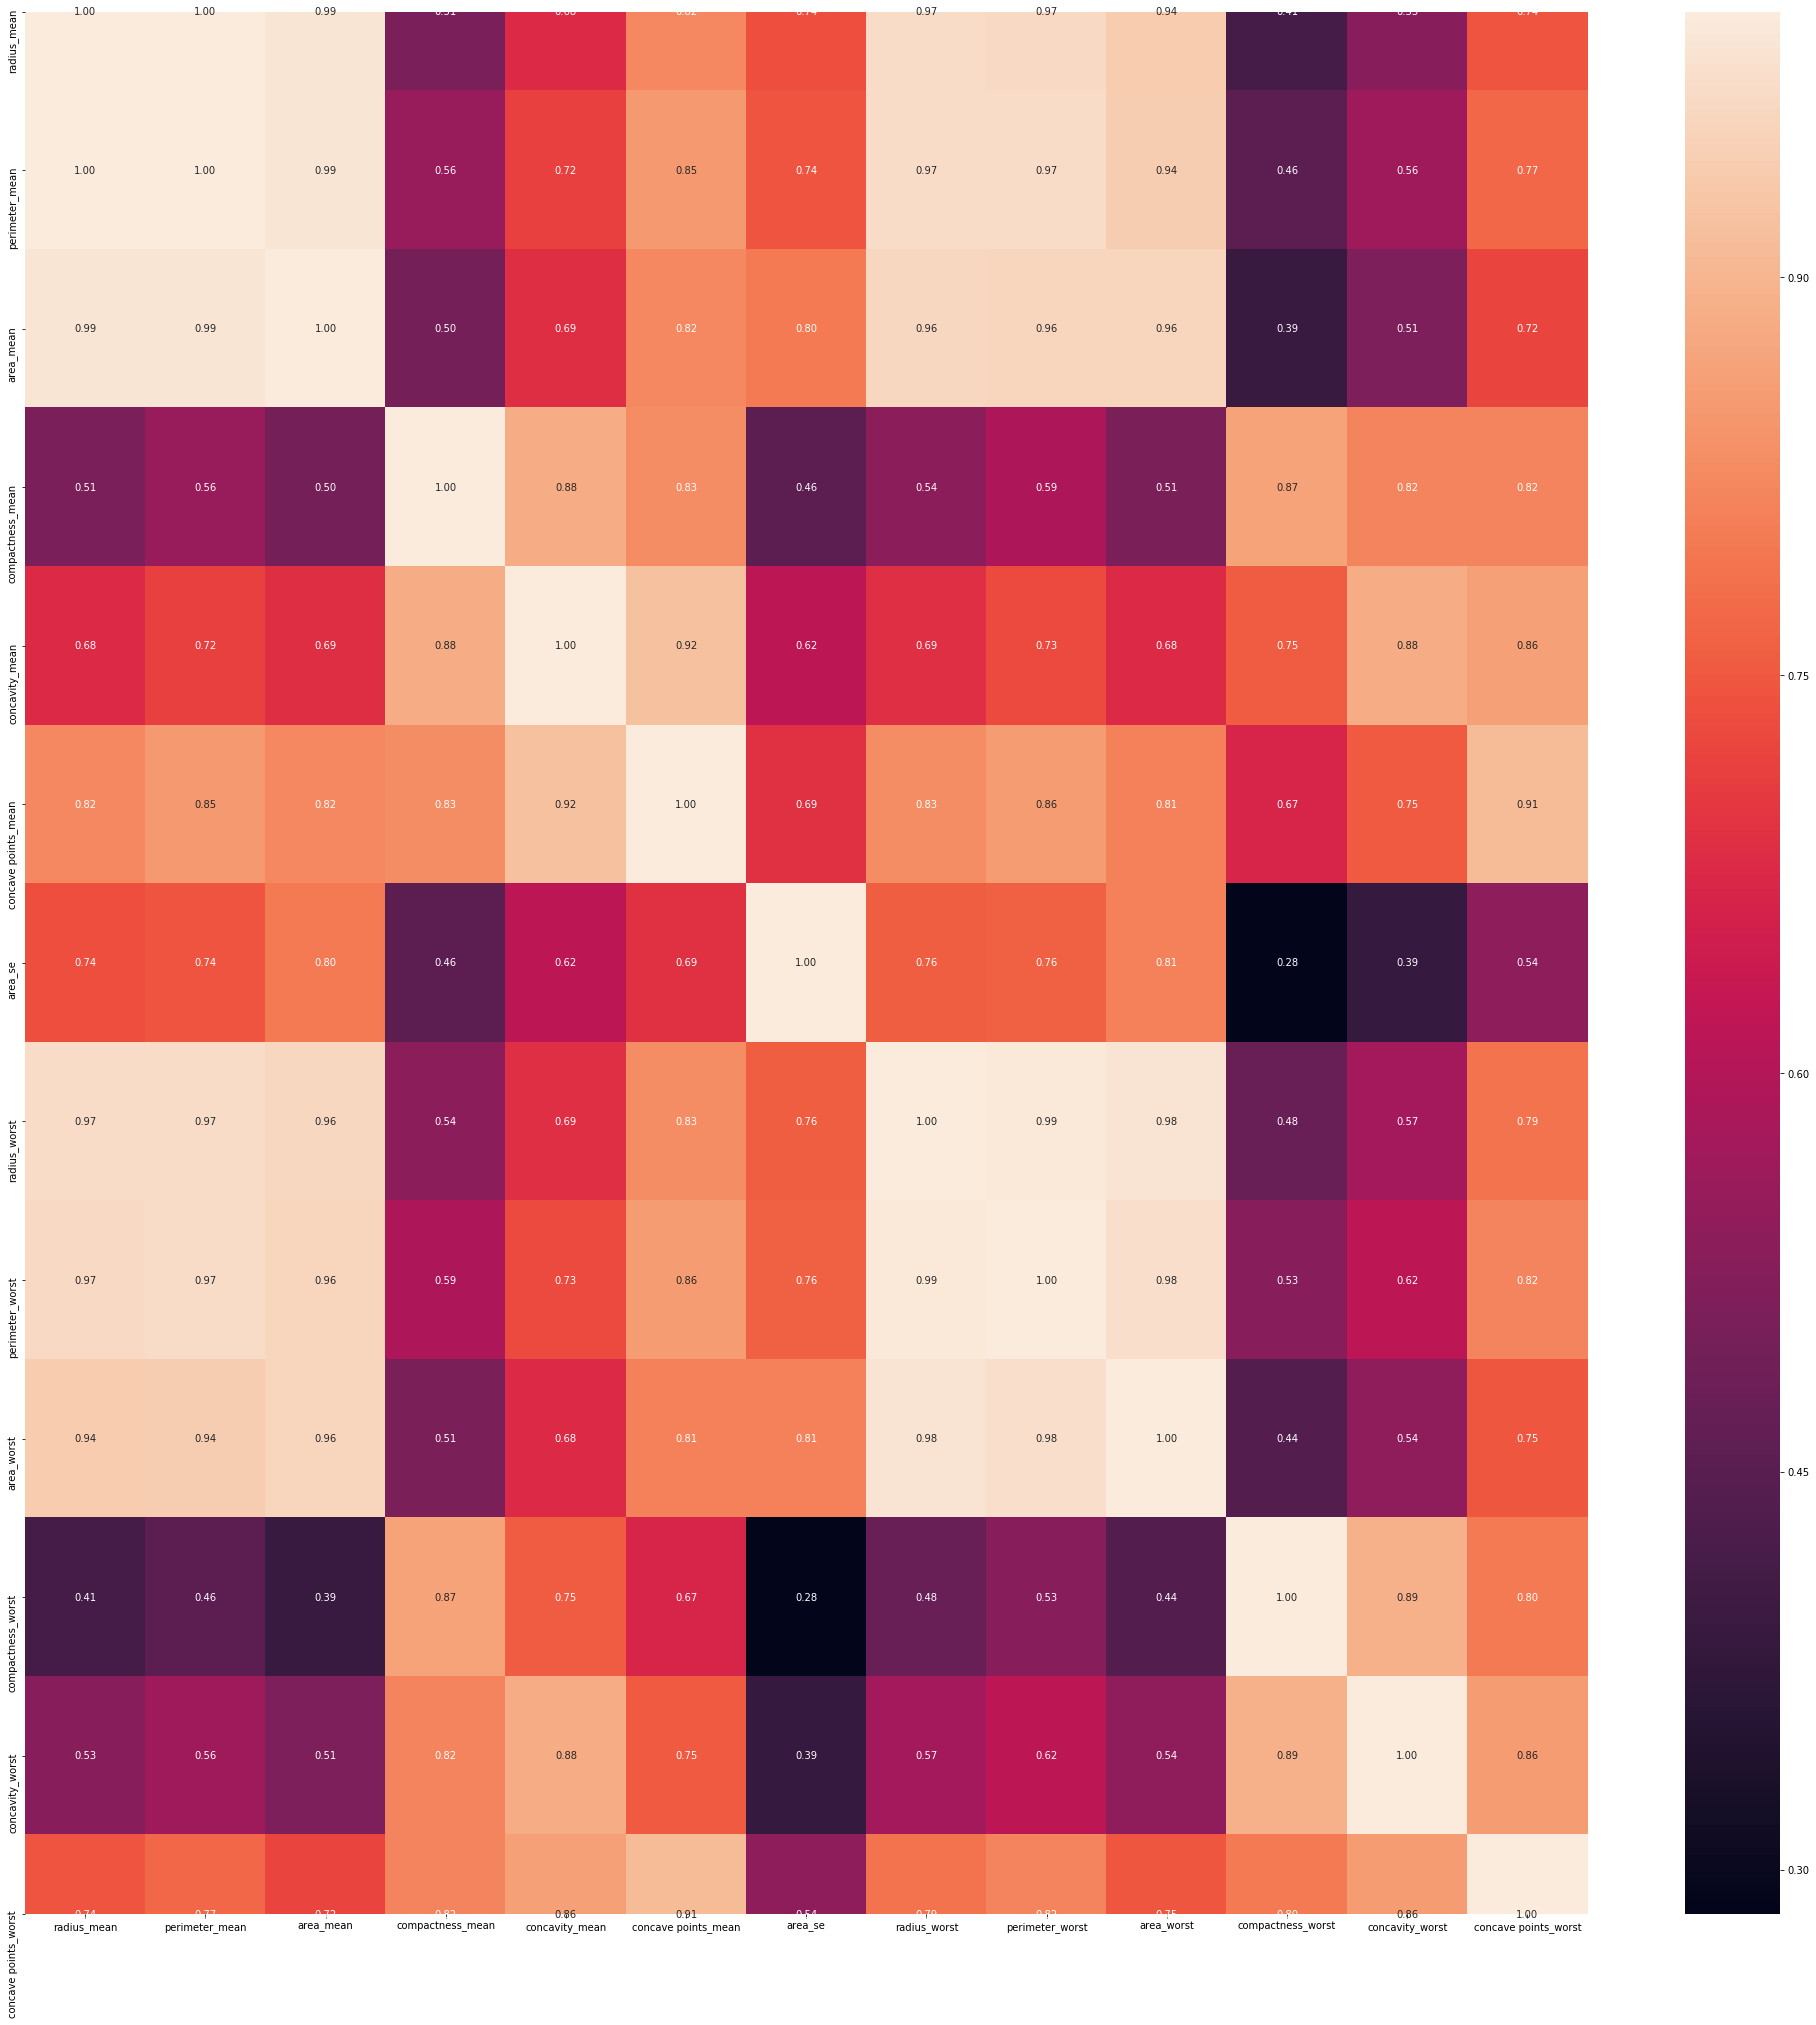

In [54]:
plt.figure(figsize=(35,35));
sns.heatmap(corr_modified, annot=True, fmt='.2f');

In [55]:
# iterate over columns only in the lower triangular matrix of correlation matrix
most_correlated = []
j = 1
for i in np.arange(corr_modified.shape[0]):
    for k in np.arange(j, corr_modified.shape[1]):
        if corr_modified.iat[k,i] > 0.85:
            # write to most_correlated array correlated features pairs
            most_correlated.append([corr_modified.columns.values[k], corr_modified.index.values[i]])
            print(k, corr_modified.columns.values[k], i,corr_modified.index.values[i], corr_modified.iat[k, i])
    j += 1

1 perimeter_mean 0 radius_mean 0.9978552814938113
2 area_mean 0 radius_mean 0.9873571700566119
7 radius_worst 0 radius_mean 0.9695389726112053
8 perimeter_worst 0 radius_mean 0.9651365139559878
9 area_worst 0 radius_mean 0.9410824595860459
2 area_mean 1 perimeter_mean 0.9865068039913906
5 concave points_mean 1 perimeter_mean 0.8509770412528199
7 radius_worst 1 perimeter_mean 0.9694763634663142
8 perimeter_worst 1 perimeter_mean 0.9703868870426388
9 area_worst 1 perimeter_mean 0.9415498080023057
7 radius_worst 2 area_mean 0.9627460860470841
8 perimeter_worst 2 area_mean 0.959119574355266
9 area_worst 2 area_mean 0.9592133256499006
4 concavity_mean 3 compactness_mean 0.8831206701772499
10 compactness_worst 3 compactness_mean 0.8658090398022638
5 concave points_mean 4 concavity_mean 0.9213910263788594
11 concavity_worst 4 concavity_mean 0.8841026390943831
12 concave points_worst 4 concavity_mean 0.8613230336379504
8 perimeter_worst 5 concave points_mean 0.8559231281343112
12 concave point

In [56]:
data = data.drop(columns = ['perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst',
                           'area_worst', 'concavity_worst', 'compactness_worst', 'radius_worst',
                           'concave points_worst', 'compactness_mean', 'concave points_mean' ])

In [57]:
data.describe()

,radius_mean,concavity_mean,area_se
count,569.000000,569.000000,569.000000
mean,14.127292,0.088799,40.337079
std,3.524049,0.079720,45.491006
min,6.981000,0.000000,6.802000
25%,11.700000,0.029560,17.850000
50%,13.370000,0.061540,24.530000
75%,15.780000,0.130700,45.190000
max,28.110000,0.426800,542.200000


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 4 columns):
diagnosis         569 non-null object
radius_mean       569 non-null float64
concavity_mean    569 non-null float64
area_se           569 non-null float64
dtypes: float64(3), object(1)
memory usage: 17.9+ KB


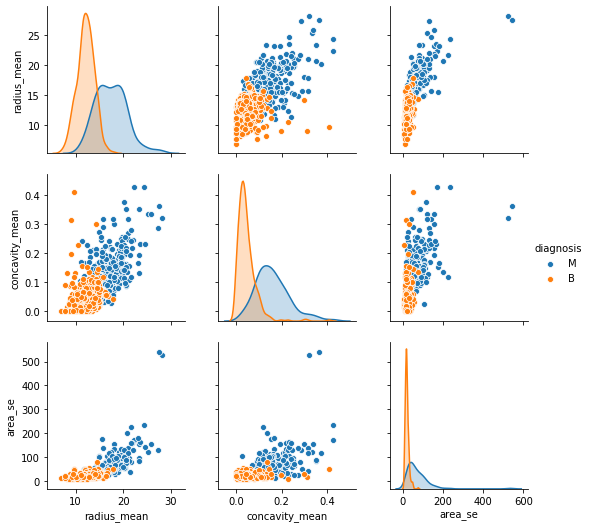

In [59]:
sns.pairplot(data, hue='diagnosis')

From pairplot above we can see that malignant and benign cases form two rather separate classes.

<a id="Training"></a>

## 7. Training

<a id="Logistic_Regression"></a>

### Logistic Regression

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [61]:
# target variable
y = data['diagnosis']
# exclude target variable from features
X = data.drop(['diagnosis'], axis=1)

In [62]:
y = y.replace('M', 1)
y = y.replace('B', 0)

In [63]:
# split dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 3) (171, 3) (398,) (171,)


In [64]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [65]:
# Let's scale numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
print("Train quality:")
quality_report(log_reg.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.915
Precision: 0.836
Recall: 0.924
f1_score: 0.878

Test quality:
Accuracy: 0.936
Precision: 0.879
Recall: 0.951
f1_score: 0.913


C:\Users\dinak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


We've got very high metric values for test data.

#### Feature Importance

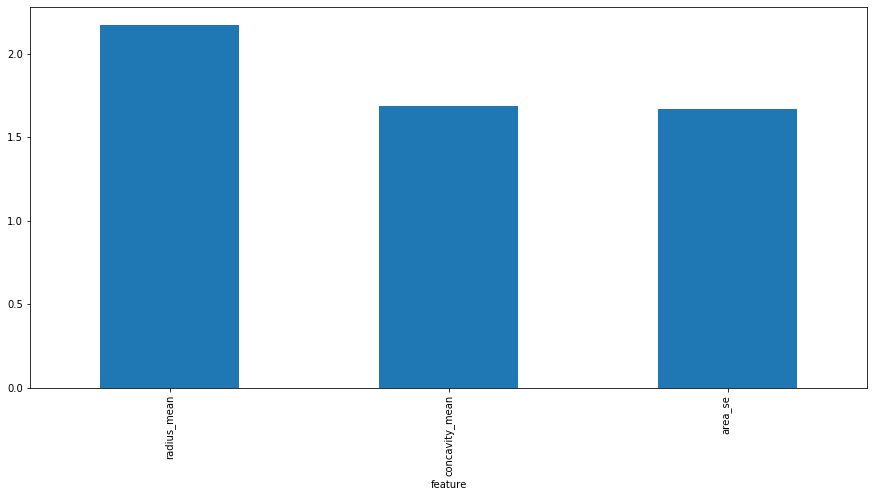

In [67]:
featureImportance = pd.DataFrame({"feature": data.drop('diagnosis', axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind = 'bar', figsize=(15, 7));

According to figure above the most valuable feature is *radius_mean*. It's intuitive because malignant tumors are usually bigger.

#### ROC curve

In [68]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(actual, prob_prediction)
    auc_score = roc_auc_score(actual, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

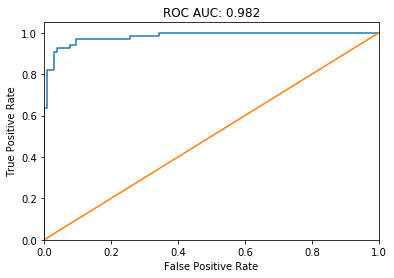

In [69]:
plot_roc_curve(log_reg.predict_proba(X_test_scaled)[:,1], y_test)

`AUC` value is pretty high (`0.982`). 

Let's find optimal value for `Cs` parameter (describes the inverse of regularization strength) via **LogisticRegressionCV**.

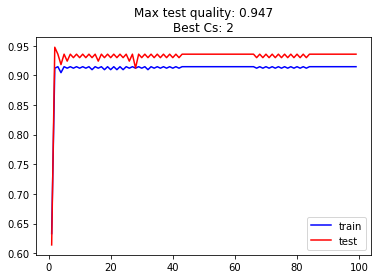

In [70]:
coefs = range(1, 100)
accuracy_train = []
accuracy_test = []
for k in coefs:
    log_reg_cv = LogisticRegressionCV(cv = 5, Cs=k)
    log_reg_cv.fit(X_train_scaled, y_train)
    accuracy_train.append(accuracy_score(log_reg_cv.predict(X_train_scaled), y_train))
    accuracy_test.append(accuracy_score(log_reg_cv.predict(X_test_scaled), y_test))
plt.plot(coefs, accuracy_train, color='blue', label='train')
plt.plot(coefs, accuracy_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest Cs: {}".format(max(accuracy_test), np.argmax(accuracy_test)+1))
plt.legend()
plt.show()

`Cs` value doesn't affect seriously training quality.

#### Feature Importance

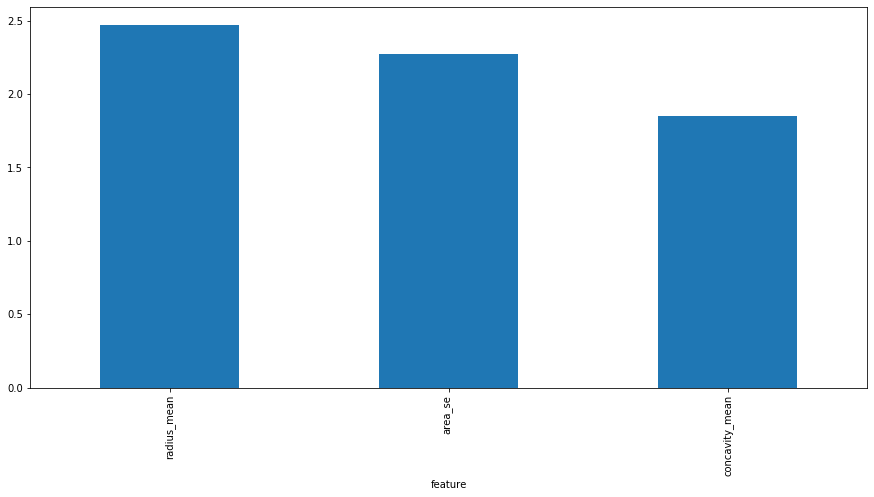

In [78]:
log_reg_cv = LogisticRegressionCV(cv = 5, Cs=2)
log_reg_cv.fit(X_train_scaled, y_train)
featureImportance = pd.DataFrame({"feature": data.drop('diagnosis', axis=1).columns, 
                                  "importance": log_reg_cv.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind = 'bar', figsize=(15, 7));

*Radius_mean* is still the most usefull feature. No changes.  

#### ROC curve

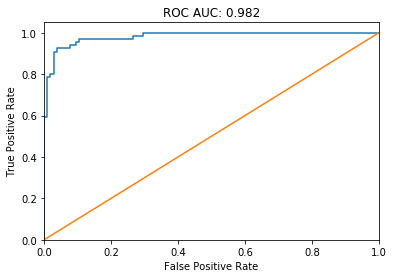

In [79]:
plot_roc_curve(log_reg_cv.predict_proba(X_test_scaled)[:,1], y_test)

No changes

<a id="KNN"></a>

### KNN (Bonus)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print("Train quality:")
quality_report(knn.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(knn.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.912
Precision: 0.863
Recall: 0.894
f1_score: 0.878

Test quality:
Accuracy: 0.942
Precision: 0.894
Recall: 0.952
f1_score: 0.922


#### ROC curve

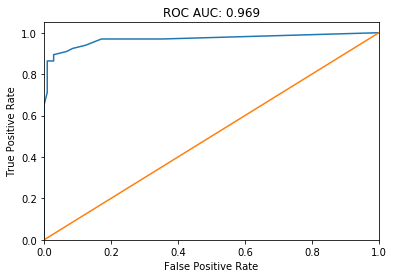

In [77]:
plot_roc_curve(knn.predict_proba(X_test_scaled)[:,1], y_test)

AUC value for KNN model is almost as good as for Logistic Regression model.

Let's find optimal value for neighbours count.

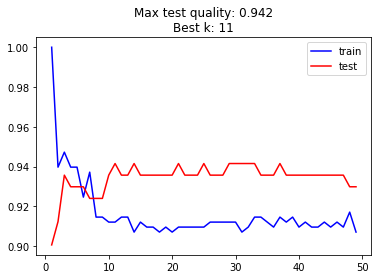

In [75]:
neighbors = range(1, 50)
accuracy_train = []
accuracy_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracy_train.append(accuracy_score(knn.predict(X_train_scaled), y_train))
    accuracy_test.append(accuracy_score(knn.predict(X_test_scaled), y_test))
    
plt.plot(neighbors, accuracy_train, color='blue', label='train')
plt.plot(neighbors, accuracy_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(accuracy_test), np.argmax(accuracy_test)+1))
plt.legend()
plt.show()

According to plot above neighbours count affects training quality significantly.

<a id="Conclusion"></a>

## 8. Conclusion

1. Only three features (*radius_mean*, *concavity_mean*, *area_se*) are used to distinguish between malignant and benign cases.
2. The most important feature is *radius_mean*, the less important is *area_se*.
3. The AUC value for LogisticRegression is slightly higher (`0.982`) than the one for KNN(`0.969`) but their difference is insignificant.